#  ** Optical Interconnection Networks **

In [1]:
# Import all the libraries needed in the Project 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy import stats
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import metrics as ms

from mpl_toolkits.mplot3d import Axes3D


### Loading the dataset

In [2]:
dataset= pd.read_csv("/Users/priyankakondaparthi/Downloads/optical_interconnection_network (2).csv")
dataset.head()

Node Number;Thread Number;Spatial Distribution;Temporal Distribution;T/R;Processor Utilization ;Channel Waiting Time;Input Waiting Time;Network Response Time;Channel Utilization;;;;;
64;4;UN;Client-Server;0 1;0 839546;1  974686;308 491814;700  514102;0                                        352431;;;;;                                                                                                                                    
                        2;0 827412;9  556437;291 037663;864  599227;0                                        506302;;;;;                                                                                                                                    
                        3;0 802605;27 027618;264 928002;839  372851;0                                        638516;;;;;                                                                                                                                    
                        4;0 723403;61 848511;235 776888;1256 053108;0                                        767051;;;;;                                                                                                                                    
                        5;0 72121;121 085884;189 680044;1343 875577;0                                        807812;;;;;

### Seperating the columns

In [3]:
dataset = pd.read_csv("/Users/priyankakondaparthi/Downloads/optical_interconnection_network (2).csv",delimiter= ';')
dataset.head()

Node Number  Thread Number Spatial Distribution Temporal Distribution  T/R  \
0           64              4                   UN         Client-Server  0,1   
1           64              4                   UN         Client-Server  0,2   
2           64              4                   UN         Client-Server  0,3   
3           64              4                   UN         Client-Server  0,4   
4           64              4                   UN         Client-Server  0,5   

  Processor Utilization  Channel Waiting Time Input Waiting Time  \
0               0,839546             1,974686         308,491814   
1               0,827412             9,556437         291,037663   
2               0,802605            27,027618         264,928002   
3               0,723403            61,848511         235,776888   
4                0,72121           121,085884         189,680044   

  Network Response Time Channel Utilization  Unnamed: 10  Unnamed: 11  \
0            700,514102            0,352431          NaN          NaN   
1            864,599227            0,506302          NaN          NaN   
2            839,372851            0,638516          NaN          NaN   
3           1256,053108            0,767051          NaN          NaN   
4           1343,875577            0,807812          NaN          NaN   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Node Number             640 non-null    int64  
 1   Thread Number           640 non-null    int64  
 2   Spatial Distribution    640 non-null    object 
 3   Temporal Distribution   640 non-null    object 
 4   T/R                     640 non-null    object 
 5   Processor Utilization   640 non-null    object 
 6   Channel Waiting Time    640 non-null    object 
 7   Input Waiting Time      640 non-null    object 
 8   Network Response Time   640 non-null    object 
 9   Channel Utilization     640 non-null    object 
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             0 non-null      float64
 12  Unnamed: 12             0 non-null      float64
 13  Unnamed: 13             0 non-null      float64
 14  Unnamed: 14             0 non-null      fl

### There are no null Values in the numerical feature columns

###  The given data is requires cleaning

1. There are some columns with no names
2. There are columns with entries "NaN" that should be handled
3. There are 10 numerical features with no null values



### * Columns with missing values are to be dropped

In [5]:
# drop columns with missing values
dataset = dataset.dropna(axis=1)
# tidy up column names
dataset.columns = dataset.columns.str.strip()


In [6]:
Node_Number, Thread_Number = dataset['Node Number'], dataset['Thread Number']
#Node_Number
#data['Node Number','Thread Number'] = dataset['Node Number','Thread Number']

### Features with , are replaced by . and converted into float

In [7]:
dataset = dataset.stack().str.replace(',','.').unstack()

In [8]:
 dataset['Node Number'], dataset['Thread Number'] =Node_Number, Thread_Number 

In [9]:
dataset.head(5)

Node Number  Thread Number Spatial Distribution Temporal Distribution  T/R  \
0           64              4                   UN         Client-Server  0.1   
1           64              4                   UN         Client-Server  0.2   
2           64              4                   UN         Client-Server  0.3   
3           64              4                   UN         Client-Server  0.4   
4           64              4                   UN         Client-Server  0.5   

  Processor Utilization Channel Waiting Time Input Waiting Time  \
0              0.839546             1.974686         308.491814   
1              0.827412             9.556437         291.037663   
2              0.802605            27.027618         264.928002   
3              0.723403            61.848511         235.776888   
4               0.72121           121.085884         189.680044   

  Network Response Time Channel Utilization  
0            700.514102            0.352431  
1            864.599227            0.506302  
2            839.372851            0.638516  
3           1256.053108            0.767051  
4           1343.875577            0.807812

In [10]:
dataset[[ 'T/R', 'Processor Utilization',
       'Channel Waiting Time', 'Input Waiting Time', 'Network Response Time',
       'Channel Utilization']] = dataset[[ 'T/R', 'Processor Utilization',
       'Channel Waiting Time', 'Input Waiting Time', 'Network Response Time',
       'Channel Utilization']].astype(float)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Node Number            640 non-null    int64  
 1   Thread Number          640 non-null    int64  
 2   Spatial Distribution   640 non-null    object 
 3   Temporal Distribution  640 non-null    object 
 4   T/R                    640 non-null    float64
 5   Processor Utilization  640 non-null    float64
 6   Channel Waiting Time   640 non-null    float64
 7   Input Waiting Time     640 non-null    float64
 8   Network Response Time  640 non-null    float64
 9   Channel Utilization    640 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 55.0+ KB


## Dataset Description

### The dataset is based on 2-dimensional broadcast-based multiprocessor architectures with multiple input queues. 

There are 640 data points,

This dataset contains 8 features as both input queues as integers and output channel parameters float data type and also contains the performance metrics with string (object) data type. 

### Data Set is Multivariate with #Instances 640, with no missing data. 8 input features and 2 performance metrics.
## Input variables: 

#### Node Number: The number of nodes in the network  (8x8 or 4x4). Data type - INTEGER

#### Thread Number: The number of threads in each node at the beginning of the simulation. Data type - INTEGER

#### T/R:  R is the packet processing time (R) (i.e., a processor spends processing an input message) and is assumed to be exponentially distributed with a mean of 100 clock cycles.                                                                        T is the message transfer time (T ) is assumed to be uniformly distributed with mean in a range from 20 to 100 clock cycles. Since T related to the packet length. data type - FLOAT

### The 2-dimensional broadcast-based multiprocessor architectures performance is a classification problem that is tested with several synthetic traffic patterns on the 2-D simultaneous optical multiprocessor exchange bus. [2]

#### 4 classes: Spatial distribution, three types of synthetic traffic patterns, Uniform (UN), Hot Region (HR), Bit reverse (BR) and Perfect Shuffle (PS)
#### 2 classes: Temporal distribution of packet generation independent (i.e., Asynchronous) and non-independent (i.e., Client-Server) traffic sources 

## Output variable: 


#### Processor Utilization: the percent of the time that threads are running in the processor. data type - FLOAT

#### Channel Waiting Time: Average waiting time of a packet at the output channel queue until it is serviced by the channel. data type - FLOAT

#### Input Waiting Time: Average waiting time of a packet until it is serviced by the processor. data type - FLOAT

#### Network Response Time: The time between a request message is enqueued at the output channel and the corresponding data message is received in the input queue. data type - FLOAT

#### Channel Utilization: The percent of the time that the channel is busy transferring packets to the network. data type - FLOAT


In [12]:
dataset.columns

Index(['Node Number', 'Thread Number', 'Spatial Distribution',
       'Temporal Distribution', 'T/R', 'Processor Utilization',
       'Channel Waiting Time', 'Input Waiting Time', 'Network Response Time',
       'Channel Utilization'],
      dtype='object')

## Attributes

A total of 10 attributes including the input features and the output variables. 

Input queues: 'Node Number', 'Thread Number','T/R', 'Spatial Distribution', 'Temporal Distribution',


Channel output parameters:  'Processor Utilization', 'Channel Waiting Time', 'Input Waiting Time', 'Network Response Time', 'Channel Utilization'

###  The String data type attributes  'Spatial Distribution', 'Temporal Distribution'  are to be encoded into numerical

In [13]:
# Spatial Distribution and temporal distribution encoding
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
dataset['Spatial Distribution']=encoder.fit_transform(dataset['Spatial Distribution'])
dataset['Temporal Distribution']=encoder.fit_transform(dataset['Temporal Distribution'])



In [14]:
dataset.head()

Node Number  Thread Number  Spatial Distribution  Temporal Distribution  \
0           64              4                     3                      1   
1           64              4                     3                      1   
2           64              4                     3                      1   
3           64              4                     3                      1   
4           64              4                     3                      1   

   T/R  Processor Utilization  Channel Waiting Time  Input Waiting Time  \
0  0.1               0.839546              1.974686          308.491814   
1  0.2               0.827412              9.556437          291.037663   
2  0.3               0.802605             27.027618          264.928002   
3  0.4               0.723403             61.848511          235.776888   
4  0.5               0.721210            121.085884          189.680044   

   Network Response Time  Channel Utilization  
0             700.514102             0.352431  
1             864.599227             0.506302  
2             839.372851             0.638516  
3            1256.053108             0.767051  
4            1343.875577             0.807812

## Distribution of Data

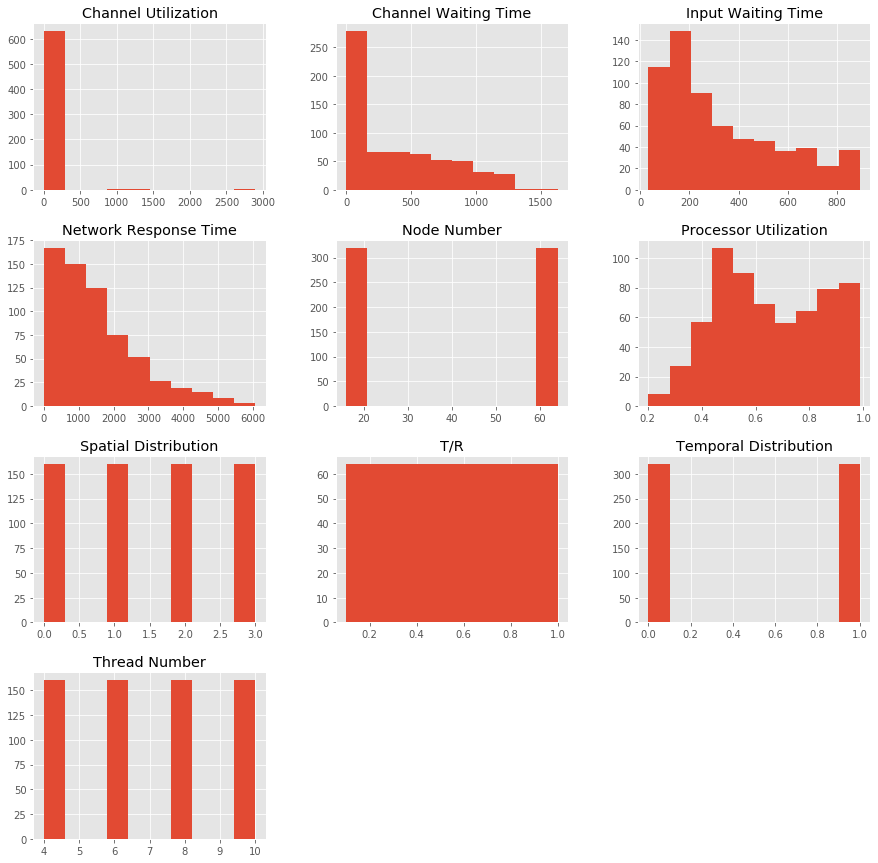

In [15]:
import matplotlib.pyplot as plt
dataset.hist(bins=10,figsize=(15,15))
plt.show()

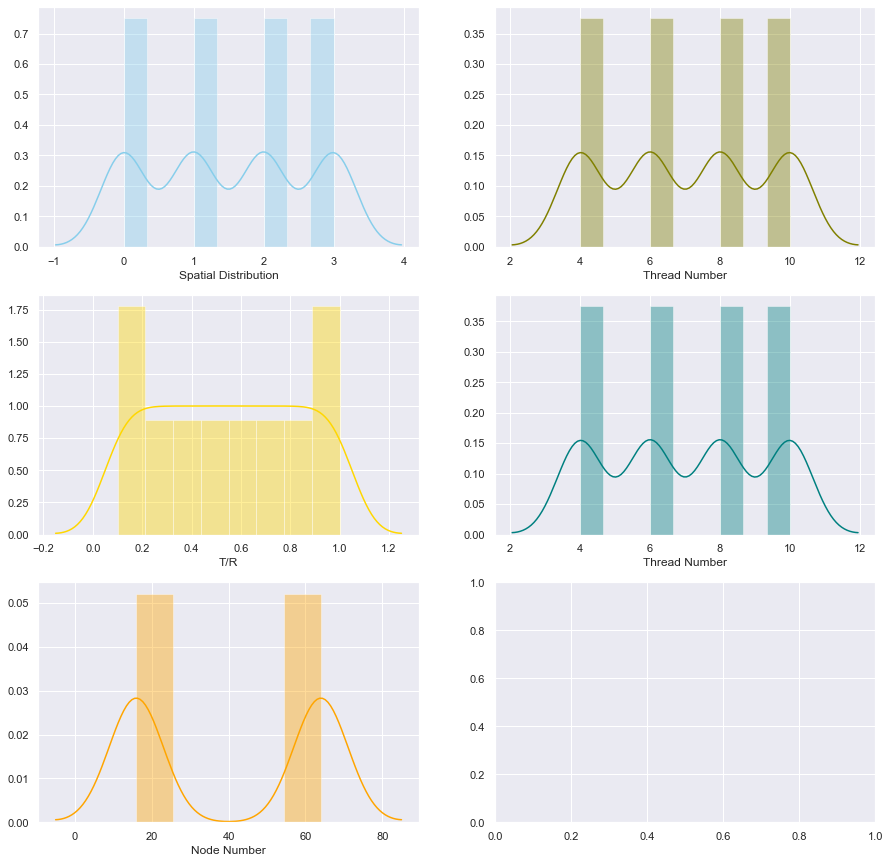

In [16]:
sns.set(color_codes= True)

f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
sns.distplot( dataset['Spatial Distribution'] , color="skyblue", ax=axes[0, 0])
sns.distplot( dataset['Thread Number'] , color="olive", ax=axes[0, 1])
sns.distplot( dataset['T/R'] , color="gold", ax=axes[1, 0])
sns.distplot( dataset['Thread Number'] , color="teal", ax=axes[1, 1])
sns.distplot( dataset['Node Number'] , color="orange", ax=axes[2, 0])

### From the Histogram we can infer that the Node number, Thread Number, T/R ratio, Spatial Distribution and Temporal destribution have the uniform symmetric distribution with no outliers

#### Node Numbers and T/R values are  uniformly distributed.
#### Node numbers have a bimodal distribution
#### Thread Numbers are {16 , 64} equally distributed
####  Spatial Distribution is 4 types namely Uniform (UN), Hot Region (HR), Bit reverse (BR) and Perfect Shuffle (PS), and are encoded as 0,1,2,3  equally distributed
####  Temporal Distribution is 2 types namely Client-Server traffic and asyncronous traffic, and are encoded as 0,1,2,3  equally distributed

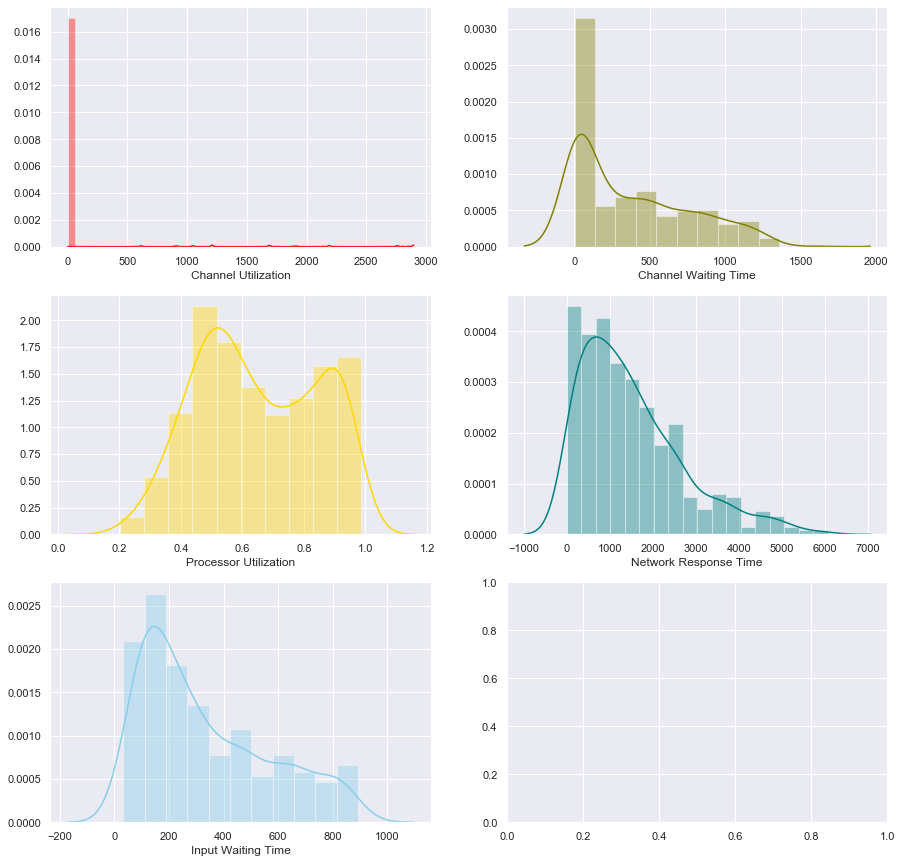

In [17]:
f, axes = plt.subplots(3,2, figsize=(15, 15), sharex=False)
sns.distplot( dataset['Channel Utilization'] , color="red",ax=axes[0, 0] )
sns.distplot( dataset['Channel Waiting Time'] , color="olive", ax=axes[0,1])
sns.distplot( dataset['Processor Utilization'] , color="gold", ax=axes[1, 0])
sns.distplot( dataset['Network Response Time'] , color="teal", ax=axes[1, 1])
sns.distplot( dataset['Input Waiting Time'] , color="skyblue", ax=axes[2, 0])

### * From Observation * #

1. The Channel Utilization is unevenly distributed with outliers
2. The Distribution of channel waiting time is right skewes and with one peak (Unimodel.
3. The Process utilization time is distributed as bimodel with two peaks 
4. The Network Response Time is a unimodel with right skew
5. Input Waiting Time is also a unimodel 

## Checking for outliers though boxplots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

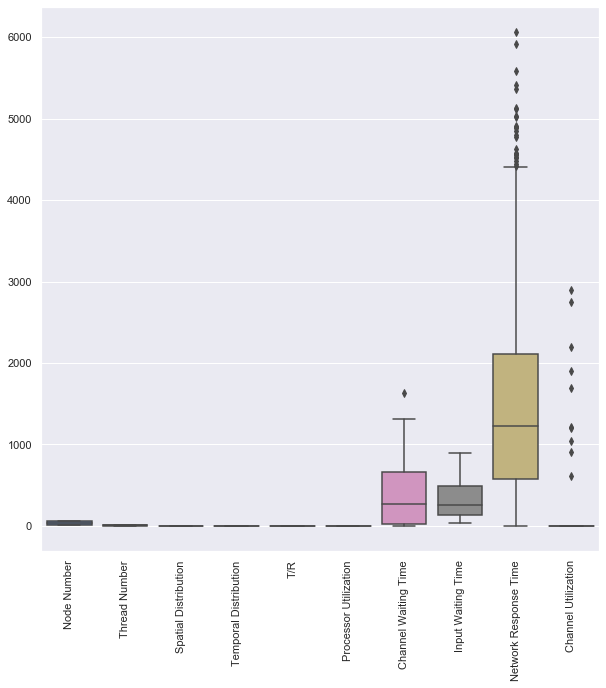

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot( data=dataset)
plt.xticks(rotation=90)

### From the boxplot : Channel Waiting time, Network Response Time, Channel Utilization have outliers in the data

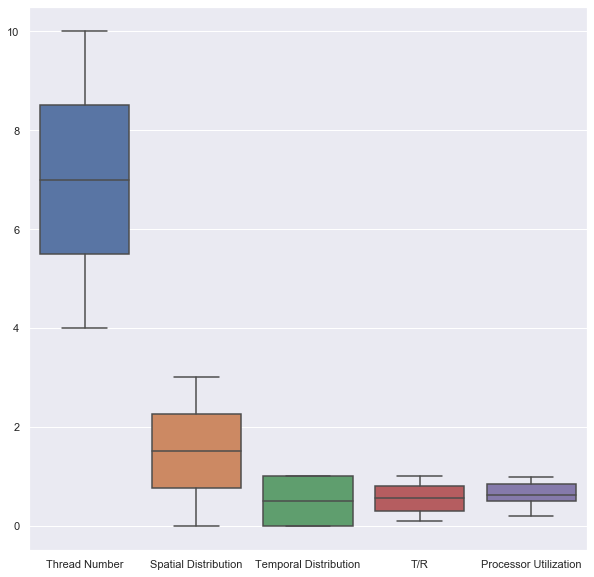

In [19]:
data_low = dataset[['Thread Number','Spatial Distribution','Temporal Distribution','T/R', 'Processor Utilization']]
plt.figure(figsize=(10,10))
sns.boxplot( data=data_low)

### Observation: 'Thread Number','Spatial Distribution','Temporal Distribution','T/R' and 'Processor Utilization' have no outliers and distribution is uniform.

### Understand stastical nature of attributes

In [20]:
dataset.describe()

Node Number  Thread Number  Spatial Distribution  \
count   640.000000     640.000000            640.000000   
mean     40.000000       7.000000              1.500000   
std      24.018772       2.237817              1.118908   
min      16.000000       4.000000              0.000000   
25%      16.000000       5.500000              0.750000   
50%      40.000000       7.000000              1.500000   
75%      64.000000       8.500000              2.250000   
max      64.000000      10.000000              3.000000   

       Temporal Distribution         T/R  Processor Utilization  \
count             640.000000  640.000000             640.000000   
mean                0.500000    0.550000               0.649013   
std                 0.500391    0.287453               0.194737   
min                 0.000000    0.100000               0.202377   
25%                 0.000000    0.300000               0.492530   
50%                 0.500000    0.550000               0.624787   
75%                 1.000000    0.800000               0.833106   
max                 1.000000    1.000000               0.986516   

       Channel Waiting Time  Input Waiting Time  Network Response Time  \
count            640.000000          640.000000             640.000000   
mean             377.459157          333.247102            1504.247529   
std              381.974899          233.721860            1202.606968   
min                0.950721           33.036130               0.529210   
25%               29.247560          137.730986             580.676198   
50%              265.614624          261.855556            1232.150369   
75%              664.965408          485.943680            2115.326618   
max             1627.330246          892.852416            6065.736672   

       Channel Utilization  
count           640.000000  
mean             26.347886  
std             223.782214  
min               0.136979  
25%               0.587539  
50%               0.773611  
75%               0.905573  
max            2895.323131

### To know the relation between the attributes

In [21]:
dataset.corr()

Node Number  Thread Number  Spatial Distribution  \
Node Number            1.000000e+00   0.000000e+00          0.000000e+00   
Thread Number          0.000000e+00   1.000000e+00          0.000000e+00   
Spatial Distribution   0.000000e+00   0.000000e+00          1.000000e+00   
Temporal Distribution  0.000000e+00   0.000000e+00          0.000000e+00   
T/R                    8.052709e-19  -1.080384e-18          1.080384e-18   
Processor Utilization -6.803708e-02   2.344896e-01          2.683593e-01   
Channel Waiting Time  -1.273671e-02   2.811040e-01         -1.477344e-03   
Input Waiting Time     2.848191e-02   5.087694e-01         -2.739391e-02   
Network Response Time  1.440280e-01   3.419492e-01          1.016388e-01   
Channel Utilization    1.144453e-01  -1.536656e-01          5.161417e-02   

                       Temporal Distribution           T/R  \
Node Number                         0.000000  8.052709e-19   
Thread Number                       0.000000 -1.080384e-18   
Spatial Distribution                0.000000  1.080384e-18   
Temporal Distribution               1.000000  0.000000e+00   
T/R                                 0.000000  1.000000e+00   
Processor Utilization               0.290211 -6.609570e-01   
Channel Waiting Time                0.012633  8.732773e-01   
Input Waiting Time                 -0.052759 -7.692040e-01   
Network Response Time               0.429973  6.315207e-01   
Channel Utilization                 0.114765  5.145444e-02   

                       Processor Utilization  Channel Waiting Time  \
Node Number                        -0.068037             -0.012737   
Thread Number                       0.234490              0.281104   
Spatial Distribution                0.268359             -0.001477   
Temporal Distribution               0.290211              0.012633   
T/R                                -0.660957              0.873277   
Processor Utilization               1.000000             -0.531863   
Channel Waiting Time               -0.531863              1.000000   
Input Waiting Time                  0.579342             -0.639091   
Network Response Time              -0.342024              0.713670   
Channel Utilization                -0.046999             -0.030036   

                       Input Waiting Time  Network Response Time  \
Node Number                      0.028482               0.144028   
Thread Number                    0.508769               0.341949   
Spatial Distribution            -0.027394               0.101639   
Temporal Distribution           -0.052759               0.429973   
T/R                             -0.769204               0.631521   
Processor Utilization            0.579342              -0.342024   
Channel Waiting Time            -0.639091               0.713670   
Input Waiting Time               1.000000              -0.378257   
Network Response Time           -0.378257               1.000000   
Channel Utilization             -0.093908              -0.142961   

                       Channel Utilization  
Node Number                       0.114445  
Thread Number                    -0.153666  
Spatial Distribution              0.051614  
Temporal Distribution             0.114765  
T/R                               0.051454  
Processor Utilization            -0.046999  
Channel Waiting Time             -0.030036  
Input Waiting Time               -0.093908  
Network Response Time            -0.142961  
Channel Utilization               1.000000

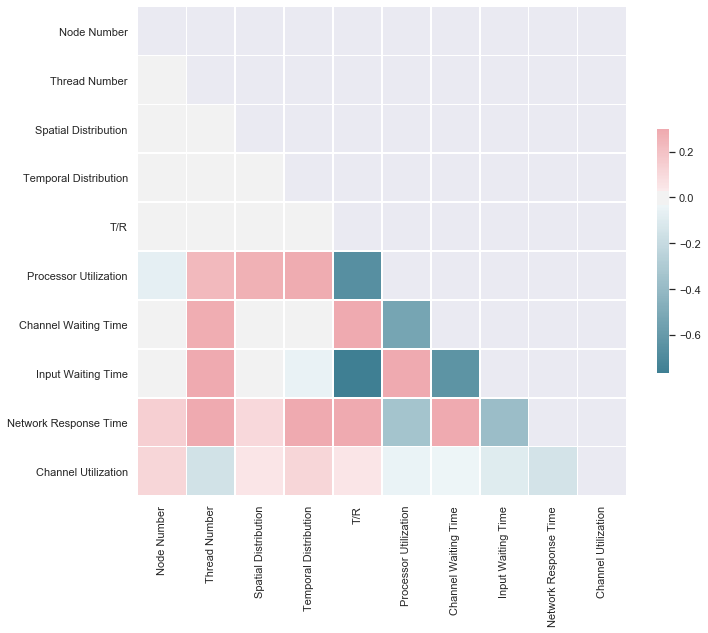

In [22]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Observations from correlation matrix
1. Input waiting time and T/R are highly correlated negalively
2. Node Number is related only with Network Response Time and Channel Utilization positively
3. Processor Utilization and T/R are negalively correlated
4. Most of the features are less correlated in range (+0.2 to -0.5)

### To understand the clustering and linearity of data

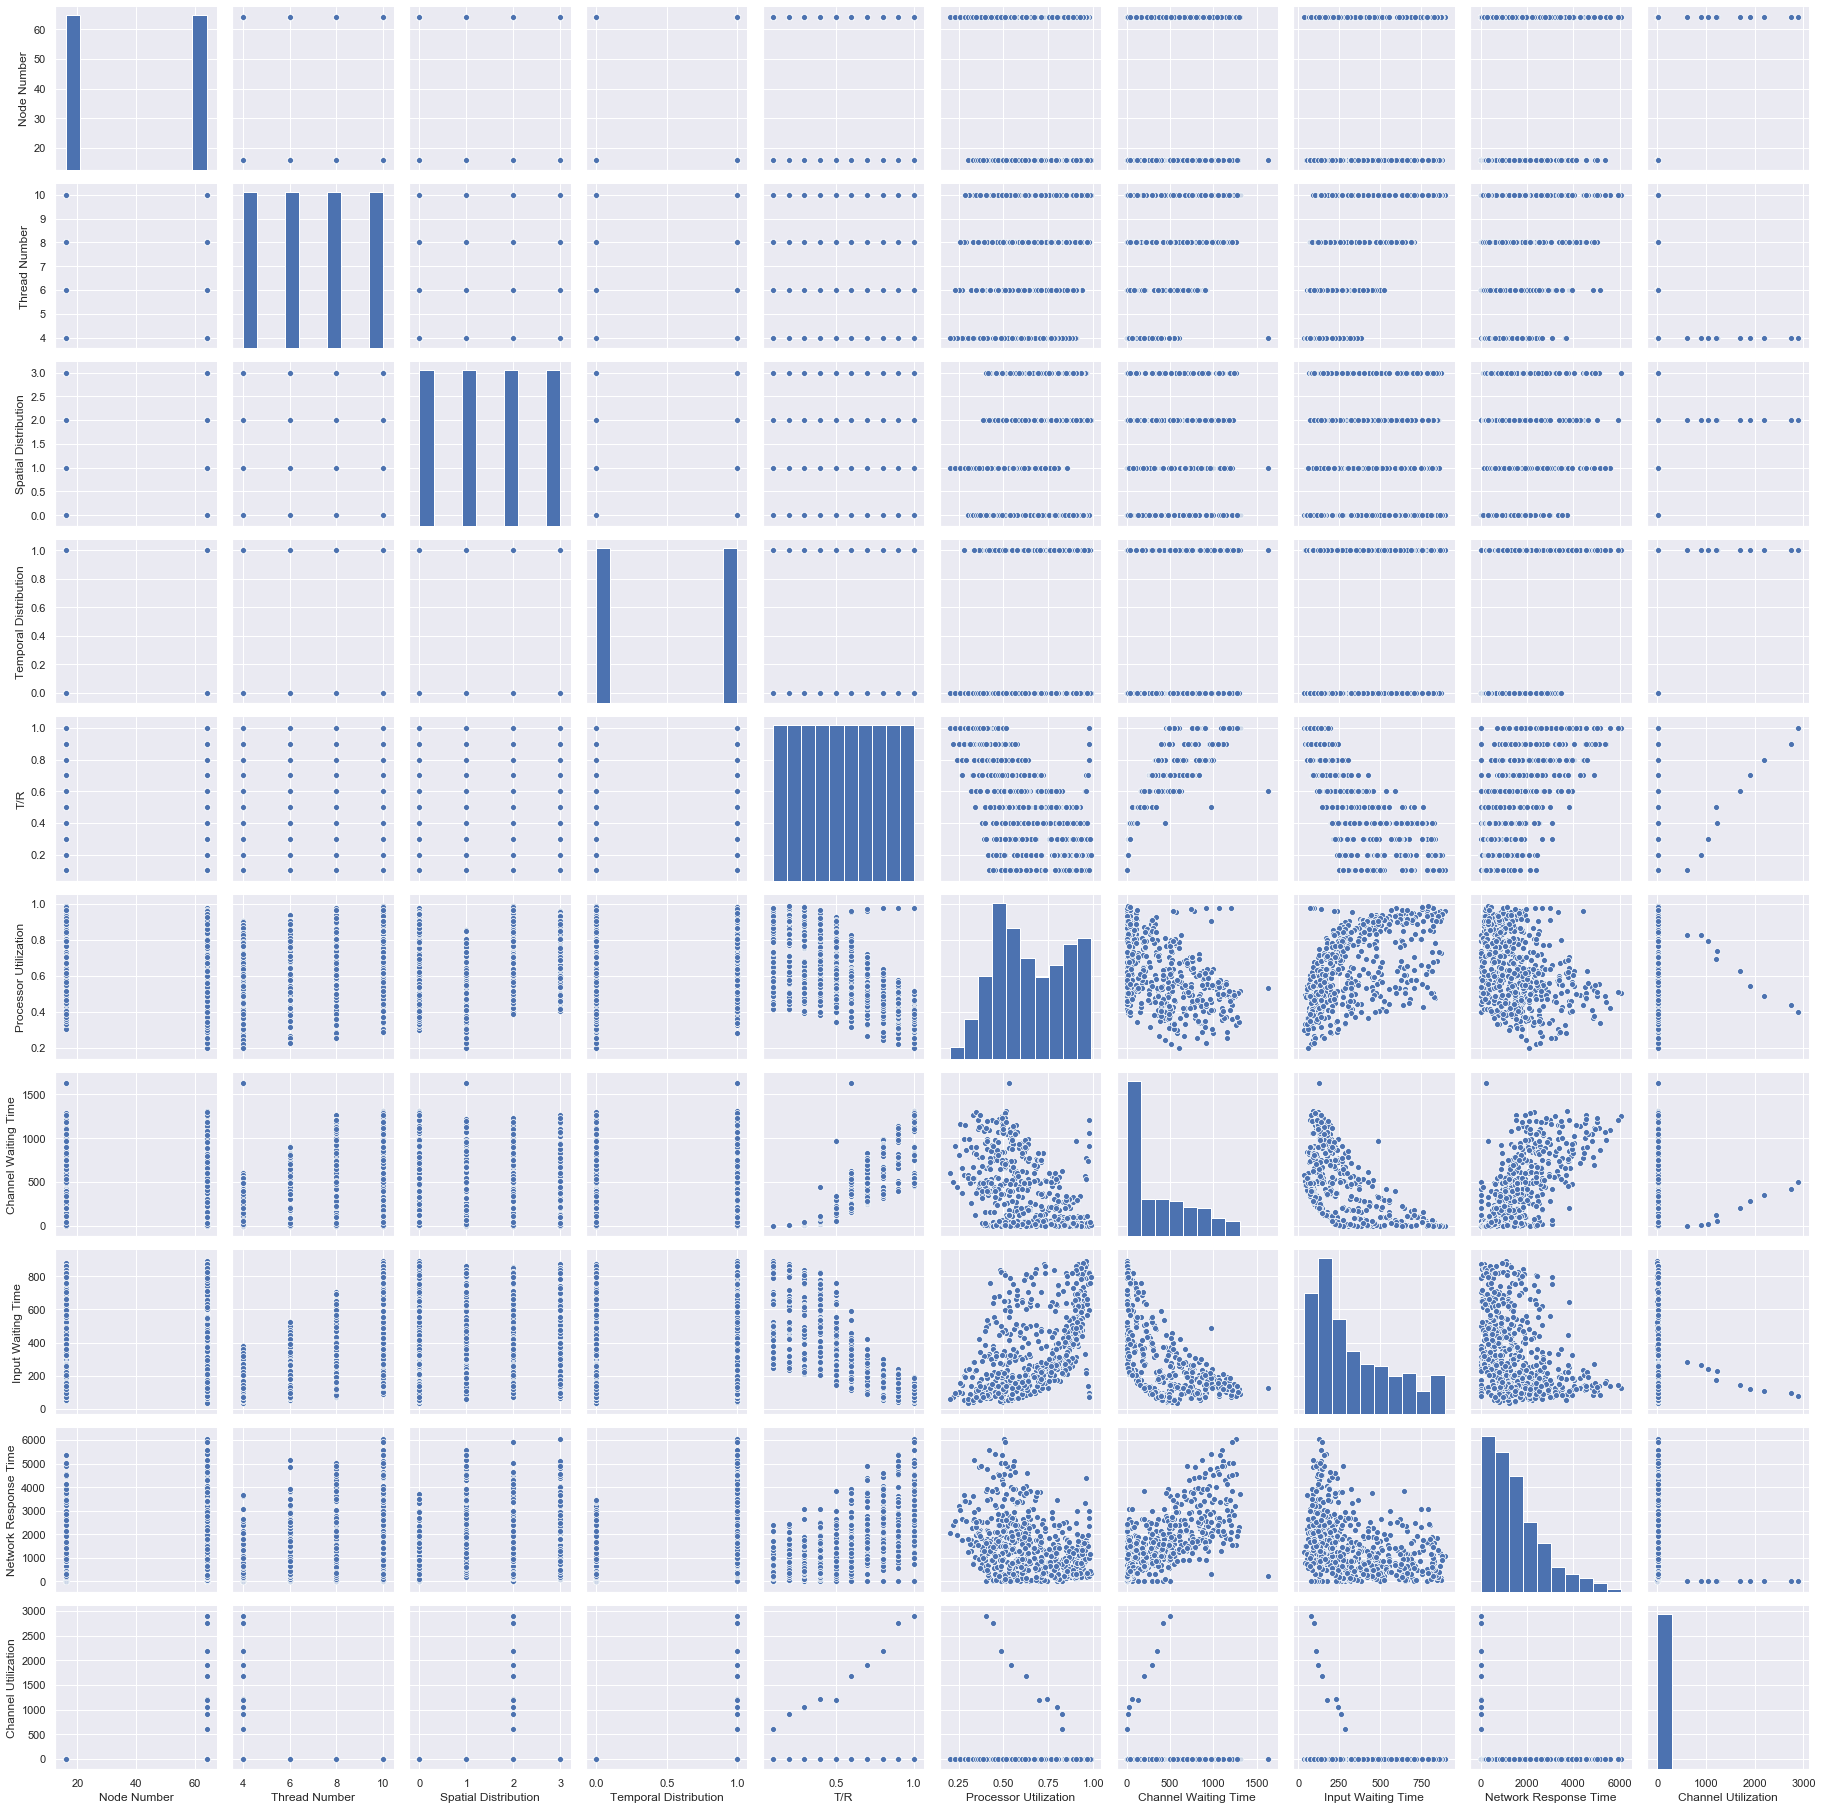

In [23]:
sns.pairplot(dataset)

### clustering based on Spatial distribution

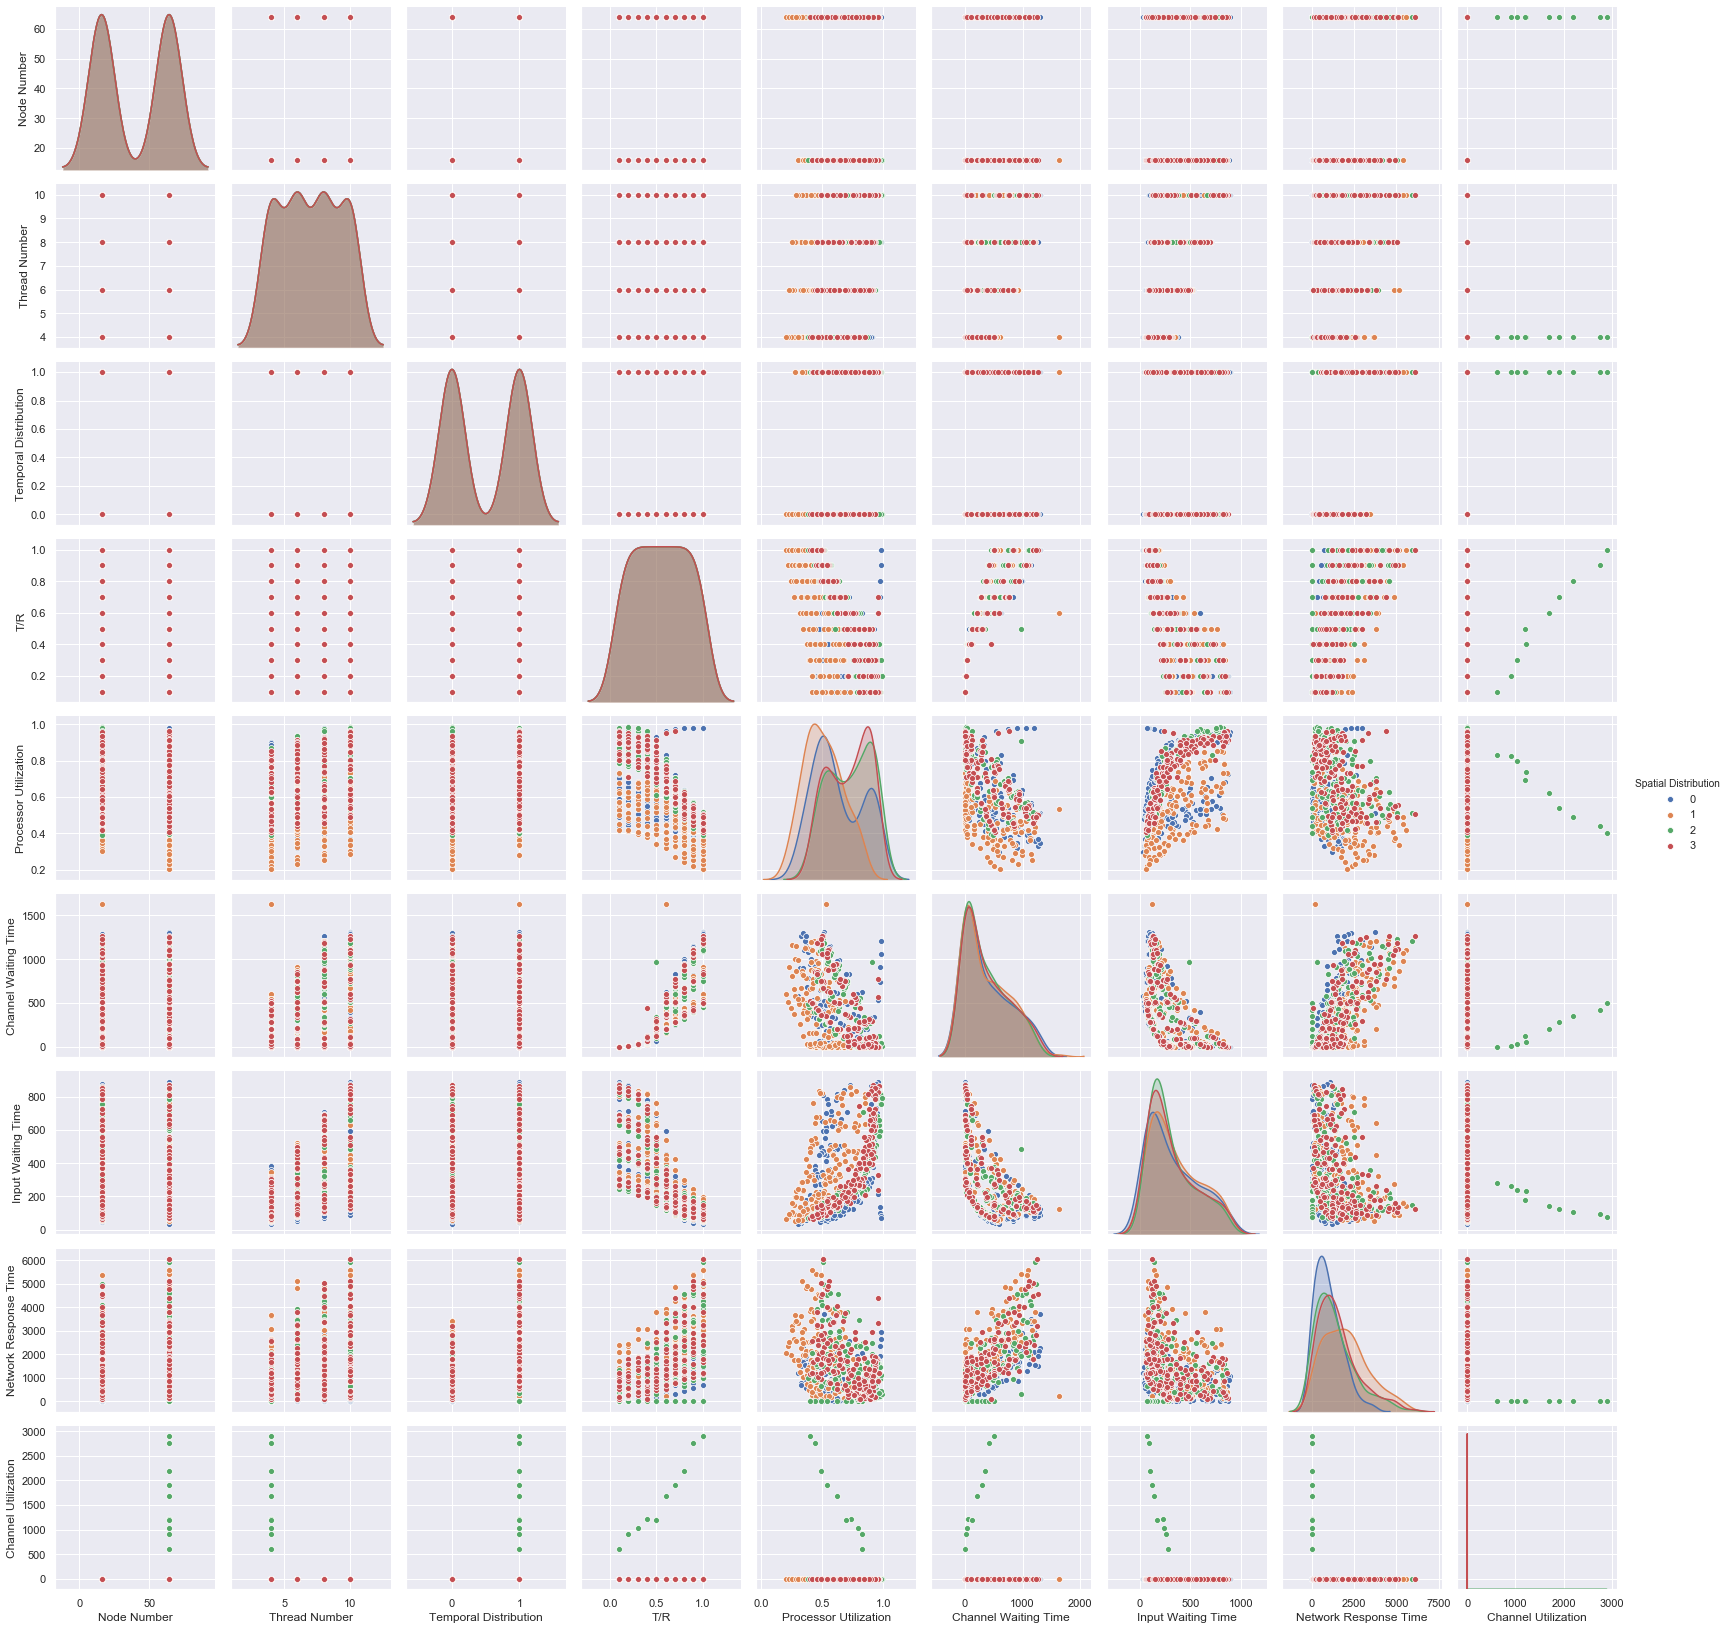

In [24]:
sns.pairplot(dataset, hue = "Spatial Distribution");

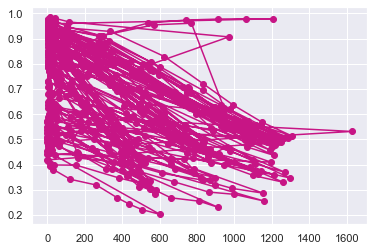

In [25]:
import seaborn as sns
plt.plot( 'Channel Waiting Time', 'Processor Utilization', data=dataset, marker='o', color='mediumvioletred')
plt.show()


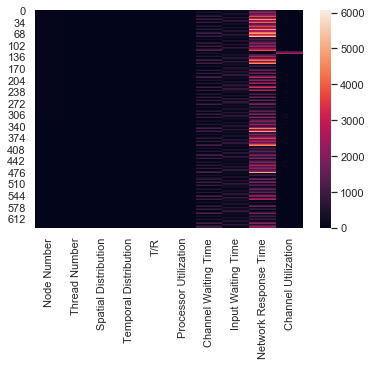

In [26]:
p1 = sns.heatmap(dataset)


### The data spread in the data
1. Node number, Thread Number, Spatial Distribution, Temporal Distribution, T/R and Processor utilization have data values below 1000.
2. Channel Utilization, input waiting time, channel waiting time have data values in the range of 1000 to 2000
3. Network Response time have a large spread of data from 0 10 6000 

#### 3 Dimensional Visualization of data spread of 3 attributes

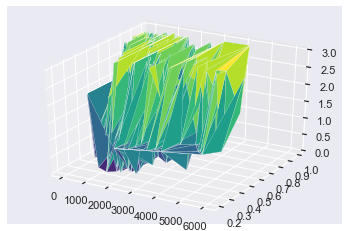

In [27]:
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(dataset['Network Response Time'], dataset['Processor Utilization'], dataset['Spatial Distribution'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

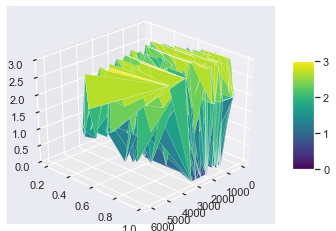

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(dataset['Network Response Time'], dataset['Processor Utilization'], dataset['Spatial Distribution'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
#plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()


In [29]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
dataset['Channel Utilization']
#Y.shape
#est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
#est.fit(Y_1)

0      0.352431
1      0.506302
2      0.638516
3      0.767051
4      0.807812
         ...   
635    0.961042
636    0.981944
637    0.962500
638    0.979375
639    0.980903
Name: Channel Utilization, Length: 640, dtype: float64

#### The surface plot of the dataset with inputs Network Response, Processor Utilization with output as Spatial Distribution
The data is distributed in a zig-zag fashion

## -----------------------------------------------------------------------------------------------------
## Training the data and Model Selection


### Channel waiting time as OUTPUT 
#### Converting channel weighting time data (R) into a set of outputs for classification 

In [30]:
channel_weight_thresholds={180:0,320:1,450:2,600:3,750:4,1000:5,1150:6}
#plt.figure(figsize=(20,25))
#channel_weight_thresholds={160:0,320:1,480:2,640:3,800:4,960:5,1120:6,1300:7}
for threshold in channel_weight_thresholds:
    dataset['channel_weight_labels'] = [int(np.round(np.round(x)/150)) if np.round(x)/150<6 else 6 for x in dataset['Channel Waiting Time']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22d91310>,
      dtype=object)

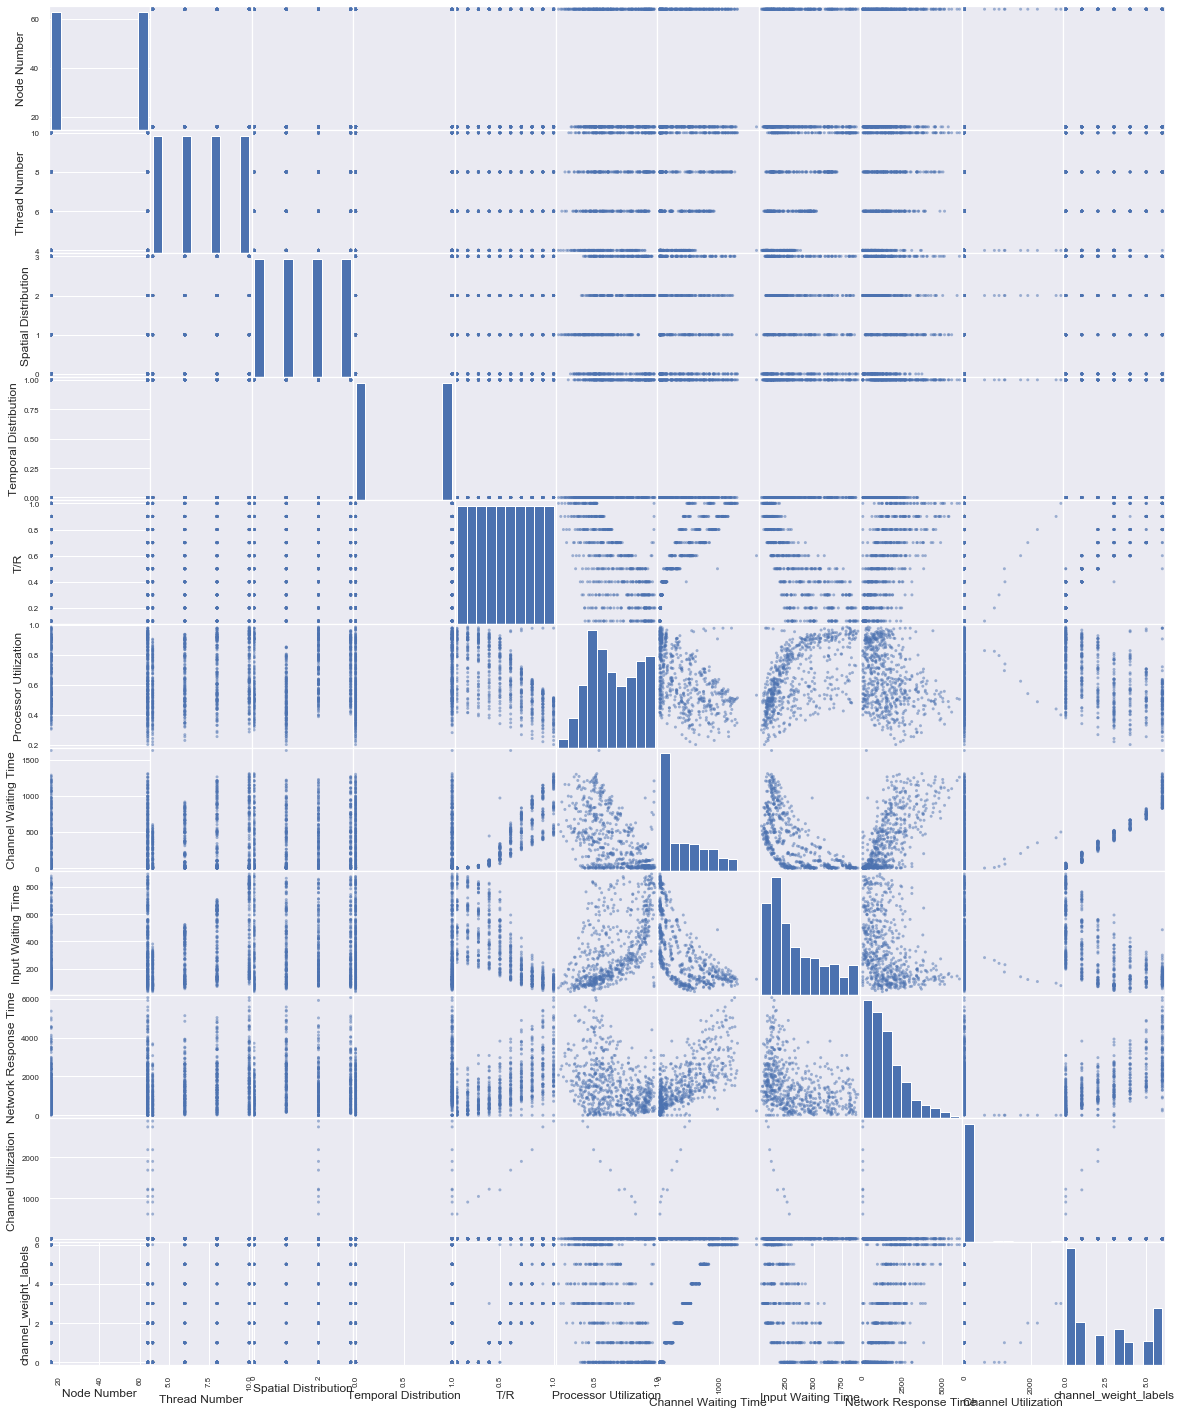

In [31]:

from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(20,25))

### Seperating Features and Labels

In [234]:
X = dataset[['Node Number', 'Thread Number', 
       'Temporal Distribution','Spatial Distribution', 'T/R']]
y= dataset['channel_weight_labels']

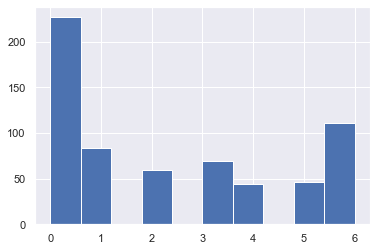

In [237]:
dataset['channel_weight_labels'].hist()

In [236]:


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)



# Feature Selection

In [35]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif,SelectFdr
subs=SelectKBest(f_classif, k=3)
X_new= subs.fit_transform(X, y)


In [36]:
subs.get_params()

{'k': 3,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [37]:
X_new = SelectFdr(f_classif, alpha=0.01).fit_transform(X, y)

In [38]:
X_new.shape

(640, 2)

In [39]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     channel_weight_labels   R-squared (uncentered):                   0.422
Model:                               OLS   Adj. R-squared (uncentered):              0.418
Method:                    Least Squares   F-statistic:                              92.85
Date:                   Fri, 15 May 2020   Prob (F-statistic):                    2.54e-73
Time:                           21:00:19   Log-Likelihood:                         -1488.3
No. Observations:                    640   AIC:                                      2987.
Df Residuals:                        635   BIC:                                      3009.
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

## BEST SUBSET SELECTION

In [40]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    

In [41]:
from tqdm import tnrange, tqdm_notebook

#Initialization variables
X = dataset[['Node Number', 'Thread Number', 
       'Temporal Distribution','Spatial Distribution', 'T/R']]
Y= dataset['channel_weight_labels']
k = 5
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if sys.path[0] == '':


In [42]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(5))
display(df_max.head(5))

numb_features         RSS  R_squared  \
4               1  728.148011   0.783539   
11              2  496.485199   0.852407   
22              3  496.033636   0.852541   
29              4  495.895824   0.852582   
30              5  495.769261   0.852620   

                                             features  
4                                              (T/R,)  
11                               (Thread Number, T/R)  
22        (Thread Number, Temporal Distribution, T/R)  
29  (Thread Number, Temporal Distribution, Spatial...  
30  (Node Number, Thread Number, Temporal Distribu...

numb_features         RSS  R_squared  \
4               1  728.148011   0.783539   
11              2  496.485199   0.852407   
22              3  496.033636   0.852541   
29              4  495.895824   0.852582   
30              5  495.769261   0.852620   

                                             features  
4                                              (T/R,)  
11                               (Thread Number, T/R)  
22        (Thread Number, Temporal Distribution, T/R)  
29  (Thread Number, Temporal Distribution, Spatial...  
30  (Node Number, Thread Number, Temporal Distribu...

In [43]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

numb_features          RSS  R_squared                  features  \
0              1  3363.746875   0.000038            (Node Number,)   
1              1  3132.210625   0.068868          (Thread Number,)   
2              1  3363.421875   0.000134  (Temporal Distribution,)   
3              1  3363.735625   0.000041   (Spatial Distribution,)   
4              1   728.148011   0.783539                    (T/R,)   

      min_RSS  max_R_squared  
0  728.148011       0.783539  
1  728.148011       0.783539  
2  728.148011       0.783539  
3  728.148011       0.783539  
4  728.148011       0.783539

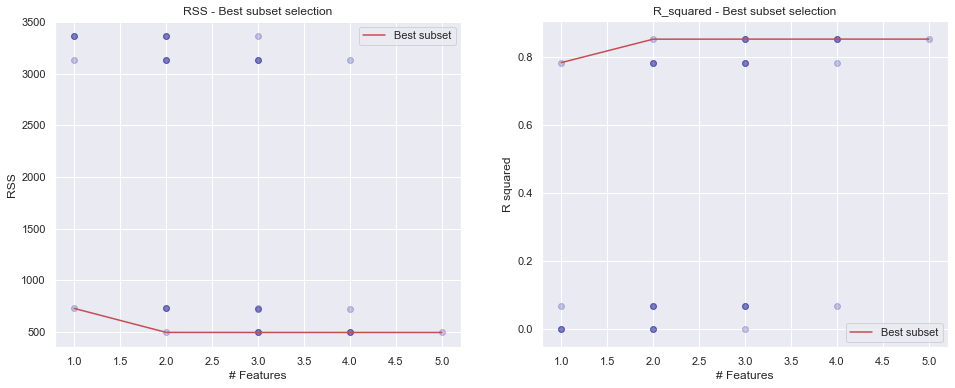

In [44]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [45]:
## Forward Subset selection

In [46]:

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()
    
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['T/R'], 728.0),
 (2, ['T/R', 'Thread Number'], 496.0),
 (3, ['T/R', 'Thread Number', 'Temporal Distribution'], 496.0),
 (4,
  ['T/R', 'Thread Number', 'Temporal Distribution', 'Spatial Distribution'],
  496.0)]

features         RSS  R_squared  \
1                                              [T/R]  728.148011   0.783539   
2                               [T/R, Thread Number]  496.485199   0.852407   
3        [T/R, Thread Number, Temporal Distribution]  496.033636   0.852541   
4  [T/R, Thread Number, Temporal Distribution, Sp...  495.895824   0.852582   
5  [T/R, Thread Number, Temporal Distribution, Sp...  495.769261   0.852620   

   numb_features       C_p       AIC       BIC  R_squared_adj  
1              1  1.140198  1.444310  1.451281       0.783200  
2              2  0.780692  0.988917  1.002859       0.851943  
3              3  0.782454  0.991148  1.012061       0.851845  
4              4  0.784705  0.994000  1.021885       0.851653  
5              5  0.786974  0.996875  1.031730       0.851457

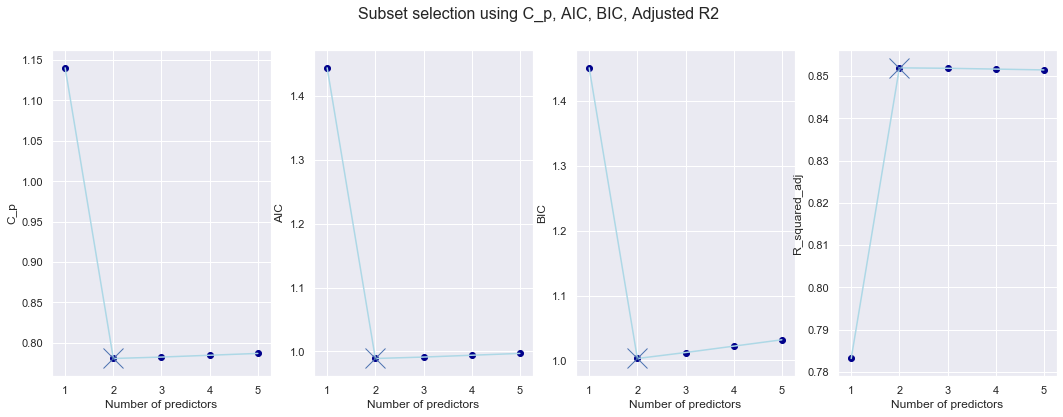

In [47]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [176]:
X = dataset[['Node Number', 'Thread Number', 
       'Temporal Distribution','Spatial Distribution', 'T/R']]
y= dataset['channel_weight_labels']

### Split the data into test and training set with 20% of data as test set

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [244]:
X_test.shape

(128, 5)

Computing regularization path ...
This took 0.530s


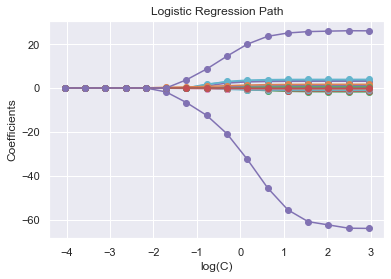

In [49]:
from sklearn.svm import l1_min_c
from sklearn import linear_model
from time import time
cs = l1_min_c(X,y, loss='log') * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

Computing regularization path ...
This took 0.278s


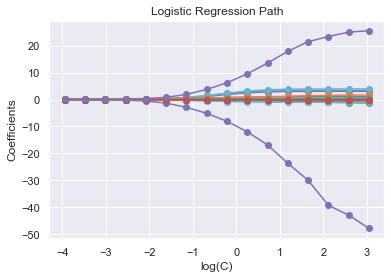

In [50]:
from sklearn.svm import l1_min_c
from sklearn import linear_model
from time import time
cs = l1_min_c(X_train,y_train, loss='log') * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(penalty='l2', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      0.79      0.87        62
           1       0.00      0.00      0.00         8
           2       0.22      0.17      0.19        12
           3       0.20      0.38      0.26         8
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.53      0.69        38

    accuracy                           0.58       128
   macro avg       0.34      0.27      0.29       128
weighted avg       0.80      0.58      0.66       128

____________________________________________________________________________________________________
0.59765625


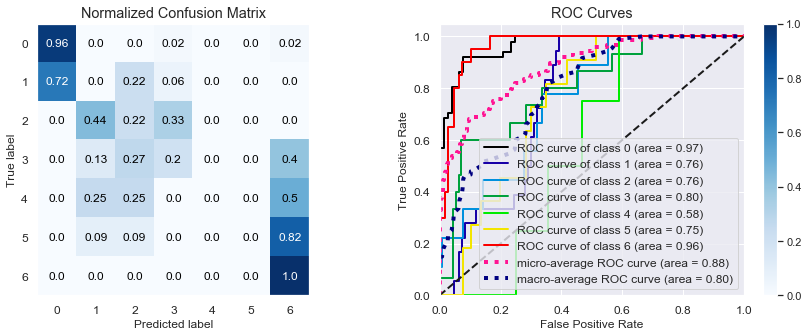

In [178]:
import scikitplot as skplt
# Logistic Regression - Basic
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)#fit(X_train, y_traindecision_function(X_test)

print(classification_report(y_pred,y_test))
print("_"*100)
y_probas = model.predict_proba(X_test)

print(model.score(X_train,y_train))
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

plt.show()



              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.78      0.64      0.70        22
           2       0.44      0.40      0.42        10
           3       0.60      0.75      0.67        12
           4       0.25      0.10      0.14        10
           5       0.18      1.00      0.31         2
           6       0.85      0.74      0.79        23

    accuracy                           0.73       128
   macro avg       0.58      0.65      0.57       128
weighted avg       0.75      0.73      0.73       128

____________________________________________________________________________________________________
0.724609375


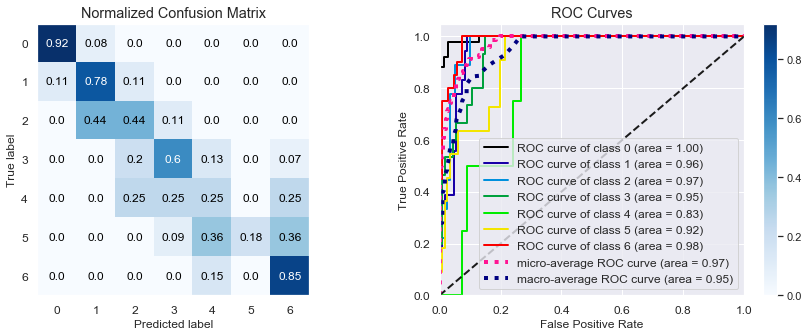

In [174]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_2 = LDA()


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=45, shuffle=True)
model_2.fit(X_train,y_train)
y_pred_2=model_2.predict(X_test)

print(classification_report(y_pred_2,y_test))
print("_"*100)
y_probas = model_2.predict_proba(X_test)
print(model_2.score(X_train,y_train) )

f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_2, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.83      0.83      0.83        18
           2       0.78      0.64      0.70        11
           3       0.73      0.92      0.81        12
           4       0.50      0.22      0.31         9
           5       0.36      0.67      0.47         6
           6       0.90      0.90      0.90        20

    accuracy                           0.84       128
   macro avg       0.73      0.73      0.71       128
weighted avg       0.84      0.84      0.83       128

____________________________________________________________________________________________________


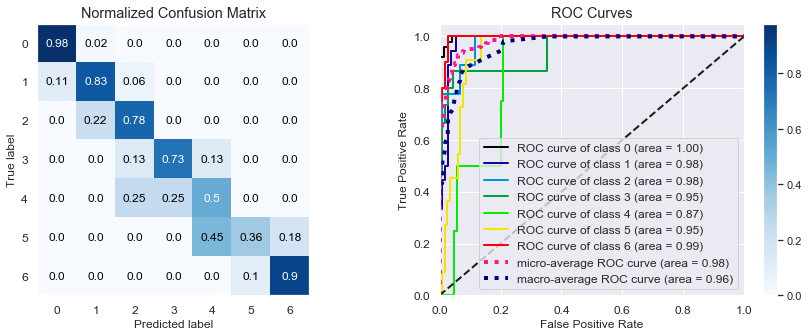

In [175]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_3 = QDA()
model_3.fit(X_train,y_train)
y_pred_3=model_3.predict(X_test)
print(classification_report(y_pred_3,y_test))
print("_"*100)
y_probas = model_3.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_3, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


0.662109375
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        91
           1       0.06      0.17      0.08         6
           2       0.22      1.00      0.36         2
           3       0.13      0.67      0.22         3
           4       0.50      0.33      0.40         6
           5       0.18      1.00      0.31         2
           6       0.75      0.83      0.79        18

    accuracy                           0.59       128
   macro avg       0.41      0.65      0.41       128
weighted avg       0.85      0.59      0.66       128

____________________________________________________________________________________________________


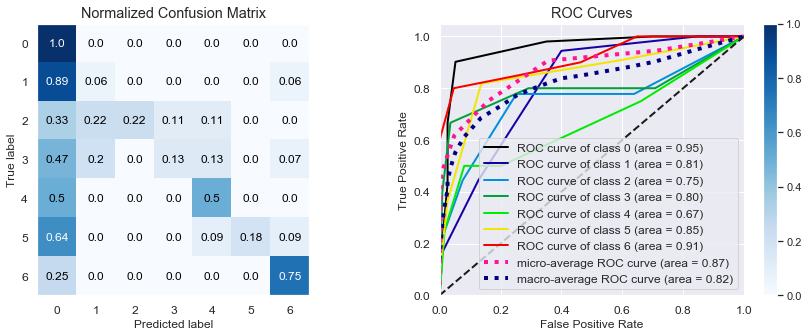

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from random import shuffle
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
neighb = KNeighborsClassifier(n_neighbors=12)
neighb.fit(X_train,y_train)
y_pred_4=neighb.predict(X_test)
print(neighb.score(X_train,y_train))
print(classification_report(y_pred_4,y_test))
print("_"*100)
y_probas = neighb.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_4, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.94      1.00      0.97        17
           2       0.89      0.89      0.89         9
           3       0.60      0.82      0.69        11
           4       0.75      0.30      0.43        10
           5       0.91      0.91      0.91        11
           6       0.95      1.00      0.97        19

    accuracy                           0.91       128
   macro avg       0.86      0.85      0.84       128
weighted avg       0.92      0.91      0.91       128



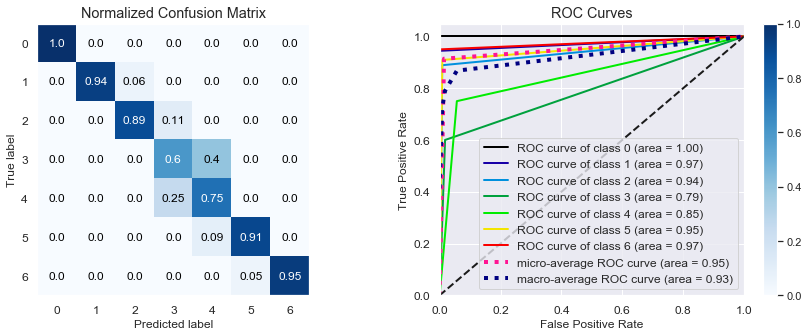

In [56]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_t=clf.predict(X_test)
print(classification_report(y_pred_t,y_test))
y_probas = clf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_t, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
#tree.plot_tree(clf.fit(X, y))

In [57]:
#conda install -c conda-forge python-graphviz

### Tree Visualization

In [58]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("optical")

'optical.pdf'

## Tree

Number of nodes in the last tree is: 1 with ccp_alpha: 0.22097598758138415


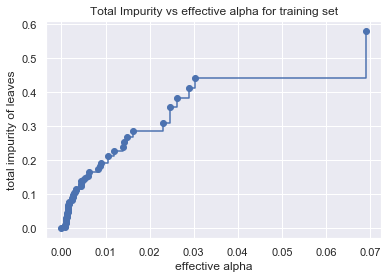

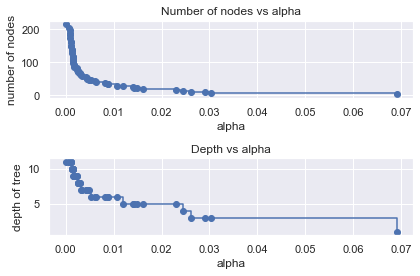

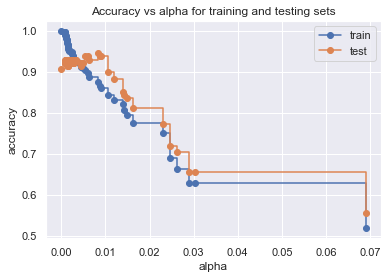

In [59]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities



from sklearn.metrics import accuracy_score
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")





clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [60]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

classification_error_rate_scorer = make_scorer(accuracy_score)
parameters = {'max_depth':range(1,30)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), parameters, n_jobs=4, cv=10,
                  scoring=classification_error_rate_scorer,return_train_score=True)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8768476621417799 {'max_depth': 6}


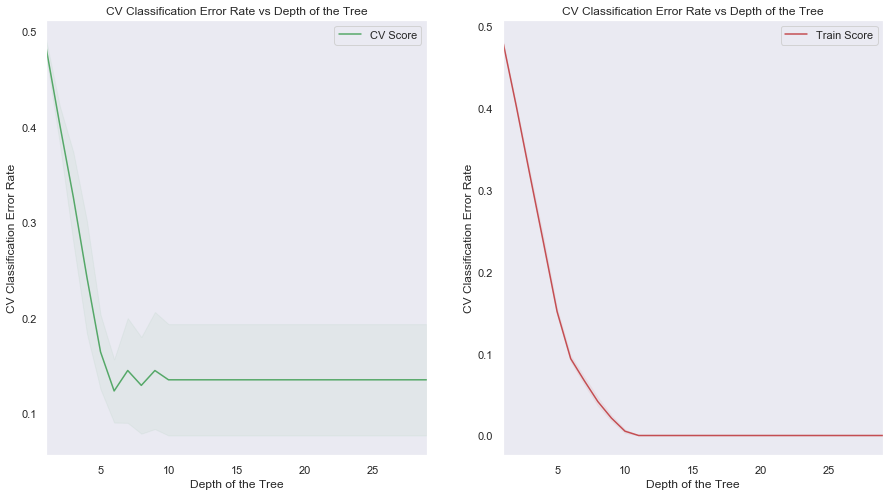

In [61]:
test_MSE = {}
test_MSE_std = {}
train_MSE = {}
train_MSE_std = {}
for idx, pm in enumerate(clf.cv_results_['param_max_depth'].data):
    test_MSE[pm] = 1 - clf.cv_results_['mean_test_score'][idx]
    test_MSE_std[pm] = clf.cv_results_['std_test_score'][idx]
    train_MSE[pm] = 1 - clf.cv_results_['mean_train_score'][idx]
    train_MSE_std[pm] = clf.cv_results_['std_train_score'][idx]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

lists = sorted(test_MSE.items())
x, y = zip(*lists)

lists = sorted(test_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='g', label='CV Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="g")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('CV Classification Error Rate')
ax.set_title('CV Classification Error Rate vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()
ax.legend()

ax = fig.add_subplot(122)
lists = sorted(train_MSE.items())
x, y = zip(*lists)

lists = sorted(train_MSE_std.items())
x1, y1 = zip(*lists)

plt.plot(x, y, color='r', label='Train Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="r")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('CV Classification Error Rate')
ax.set_title('CV Classification Error Rate vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()
ax.legend()

plt.show()

In [62]:
#We will rebuild a new tree by using above data and see how it works by tweeking the parameteres

dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

[Text(111.60000000000001, 201.90857142857143, 'X[4] <= 0.454\ngini = 0.802\nsamples = 512\nvalue = [176, 66, 50, 54, 40, 35, 91]'),
 Text(74.4, 170.84571428571428, 'gini = 0.207\nsamples = 197\nvalue = [174, 22, 0, 1, 0, 0, 0]'),
 Text(148.8, 170.84571428571428, 'X[4] <= 0.715\ngini = 0.815\nsamples = 315\nvalue = [2, 44, 50, 53, 40, 35, 91]'),
 Text(74.4, 139.78285714285715, 'X[4] <= 0.535\ngini = 0.791\nsamples = 158\nvalue = [2, 44, 41, 28, 20, 20, 3]'),
 Text(37.2, 108.72, 'gini = 0.508\nsamples = 53\nvalue = [2, 33, 17, 0, 0, 0, 1]'),
 Text(111.60000000000001, 108.72, 'X[1] <= 9.26\ngini = 0.793\nsamples = 105\nvalue = [0, 11, 24, 28, 20, 20, 2]'),
 Text(74.4, 77.65714285714284, 'X[1] <= 7.181\ngini = 0.764\nsamples = 78\nvalue = [0, 11, 24, 24, 8, 10, 1]'),
 Text(37.2, 46.59428571428572, 'gini = 0.676\nsamples = 52\nvalue = [0, 11, 24, 13, 3, 0, 1]'),
 Text(111.60000000000001, 46.59428571428572, 'X[4] <= 0.672\ngini = 0.636\nsamples = 26\nvalue = [0, 0, 0, 11, 5, 10, 0]'),
 Text(

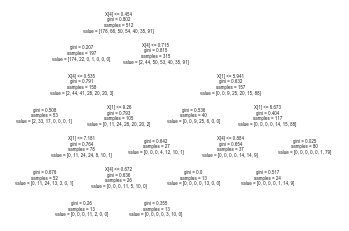

In [63]:
from sklearn import tree
tree.plot_tree(dtree.fit(X_train, y_train))

In [64]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file="HW5.dot") 
graph = graphviz.Source(dot_data) 


In [65]:
!dot -Tpng HW5.dot -o HW5.png -Gdpi=600

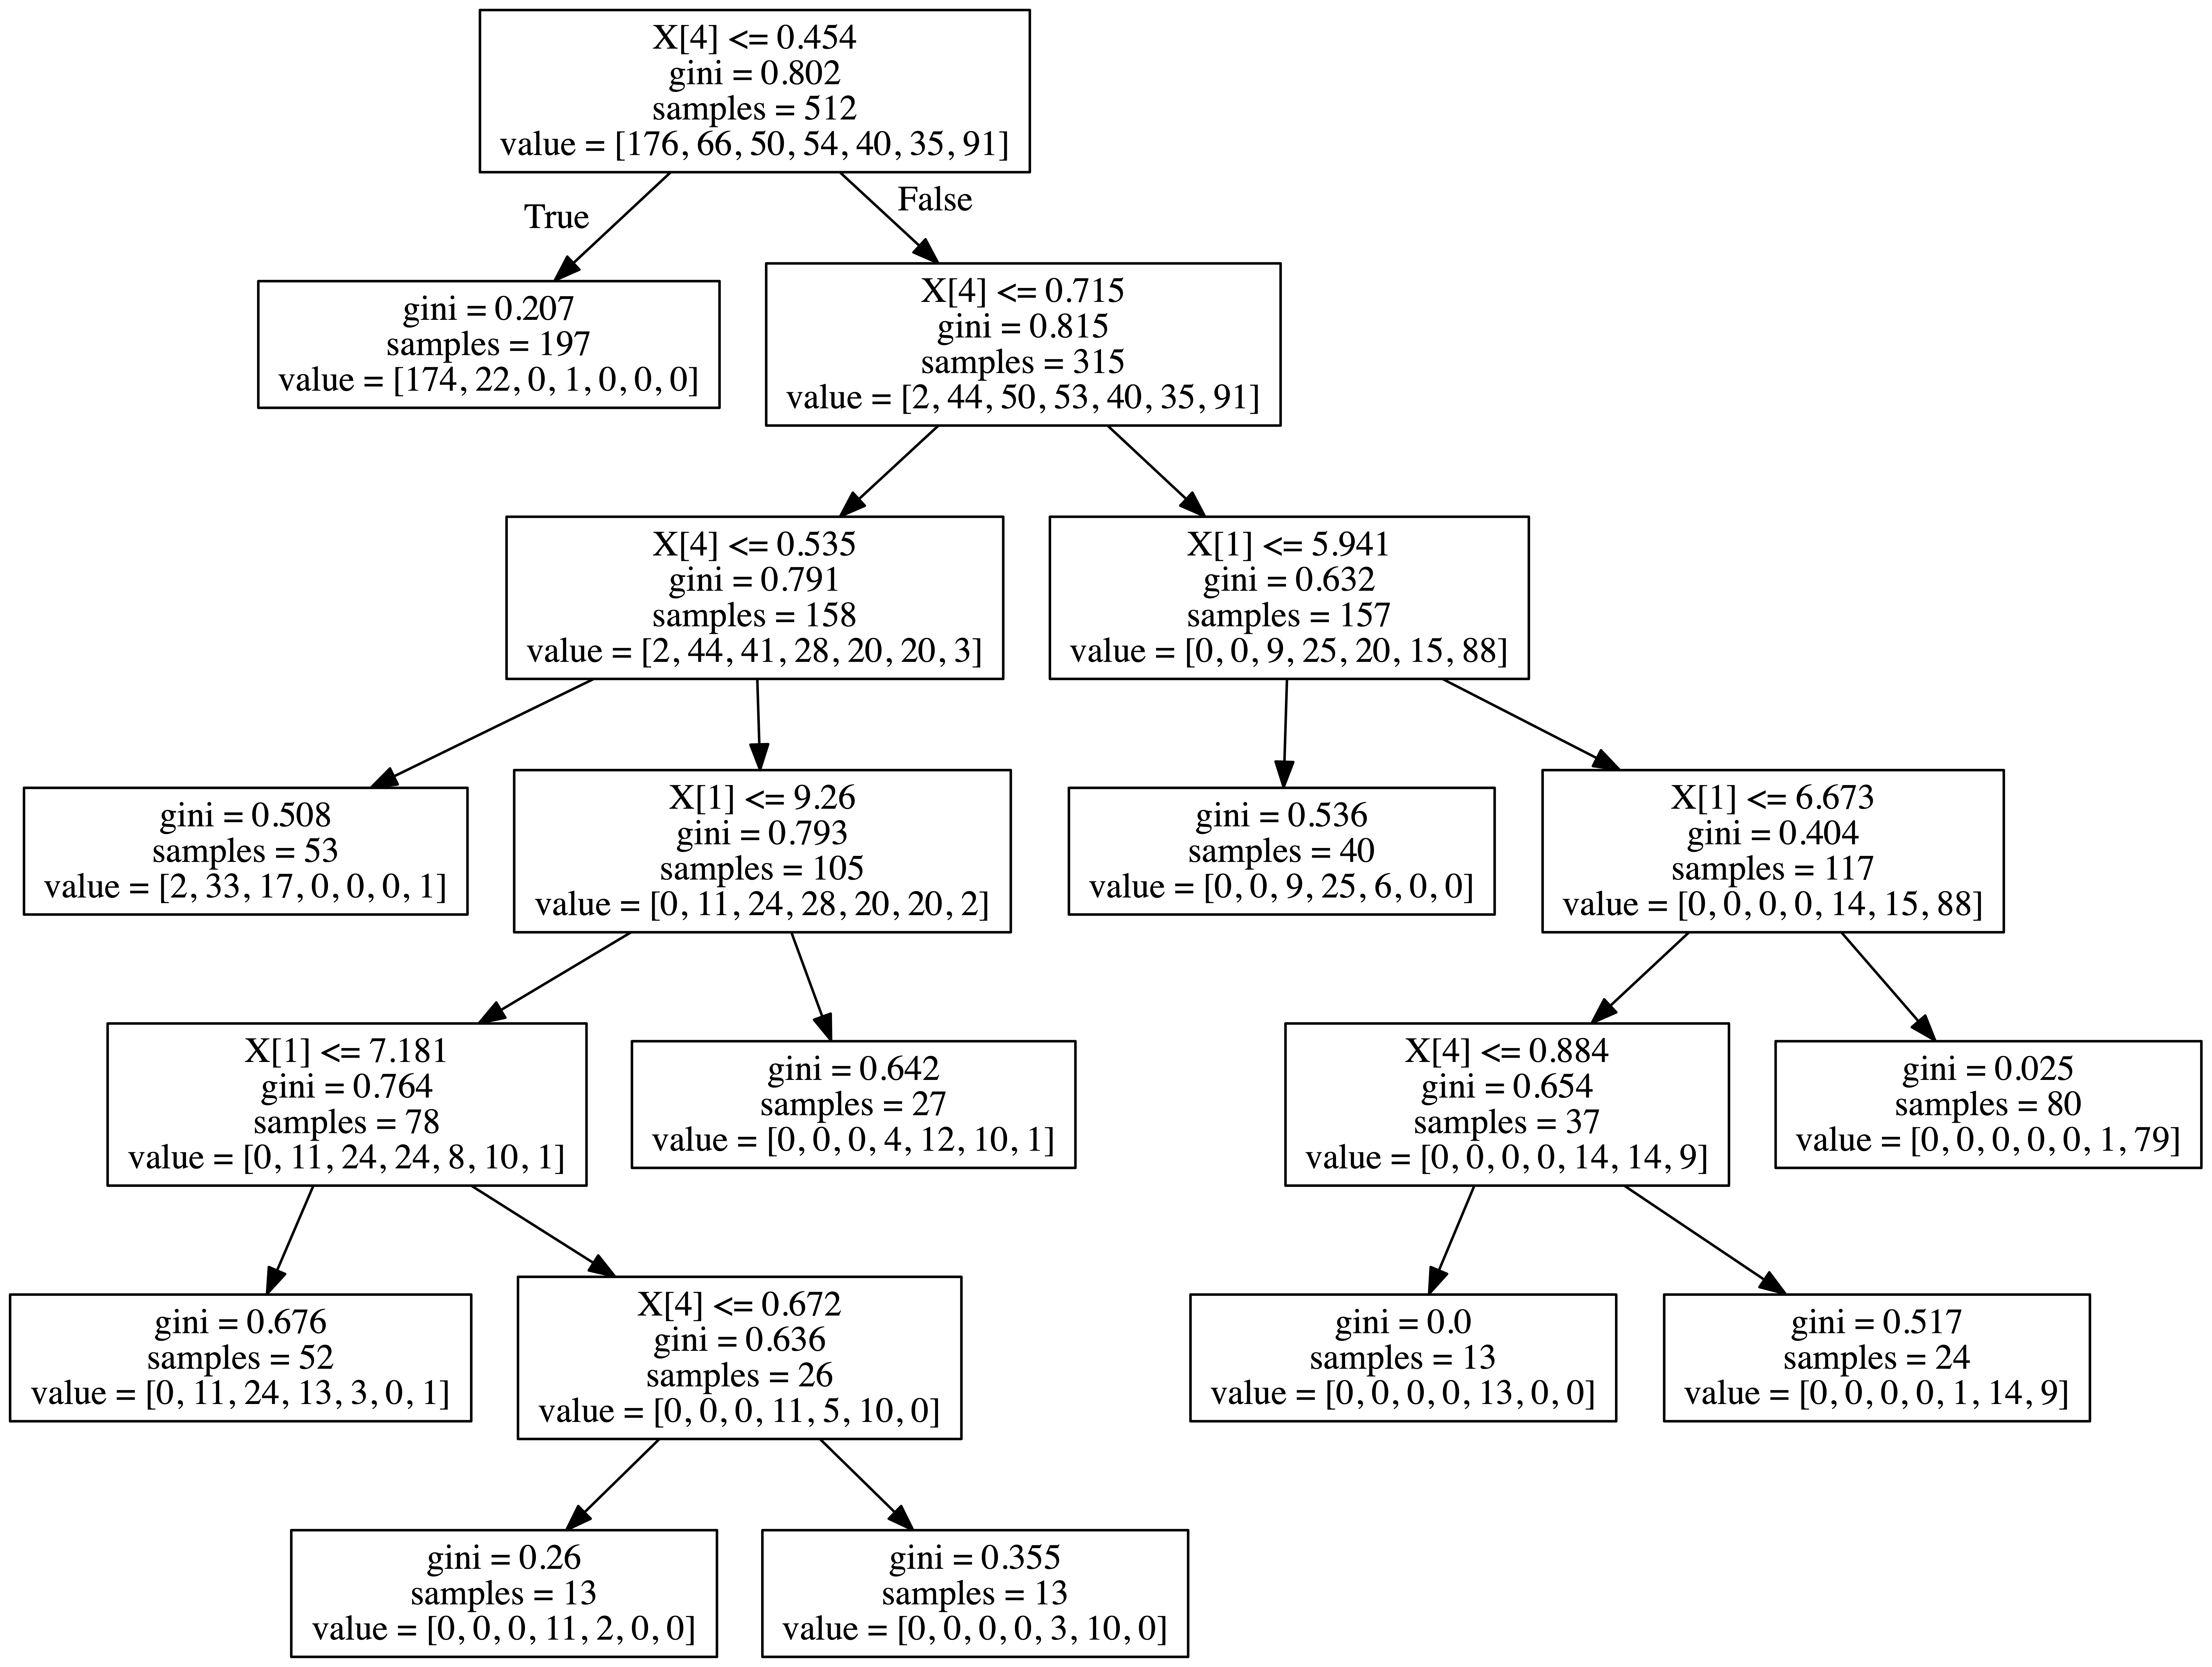

In [66]:
from IPython.display import Image
Image(filename = 'HW5.png')

In [67]:
c = DecisionTreeClassifier(random_state=1)
c.fit(X_train, y_train)
print("Training Error rate for unpurned tree is: " + str(1 - accuracy_score(c.predict(X_train), y_train)))
print("Training Error rate for pruned tree is: " + str(1 - accuracy_score(dtree.predict(X_train), y_train)))

Training Error rate for unpurned tree is: 0.0
Training Error rate for pruned tree is: 0.228515625


In [68]:
print("Test Error rate for unpurned tree is: " + str(1 - accuracy_score(c.predict(X_test), y_test)))
print("Test Error rate for pruned tree is: " + str(1 - accuracy_score(dtree.predict(X_test), y_test)))

Test Error rate for unpurned tree is: 0.0859375
Test Error rate for pruned tree is: 0.21875


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.89      0.94      0.91        17
           2       0.89      0.89      0.89         9
           3       0.73      0.85      0.79        13
           4       0.50      0.29      0.36         7
           5       0.82      0.90      0.86        10
           6       0.95      0.95      0.95        20

    accuracy                           0.91       128
   macro avg       0.83      0.83      0.82       128
weighted avg       0.90      0.91      0.90       128

____________________________________________________________________________________________________
0.923828125


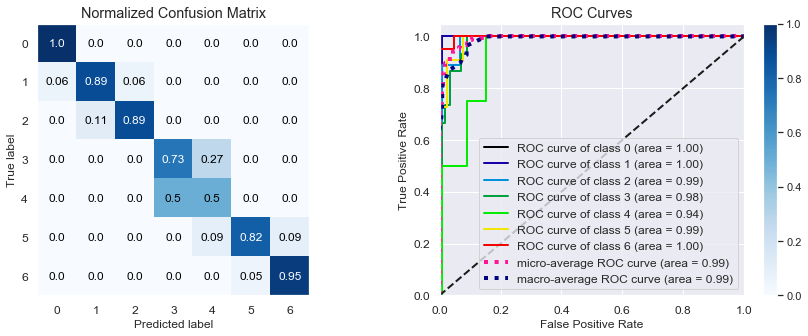

In [251]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_Rf = RandomForestClassifier(n_estimators=60,ccp_alpha=0.006, random_state=25)
clf_Rf.fit(X_train,y_train)
y_pred_Rf=clf_Rf.predict(X_test)
print(classification_report(y_pred_Rf,y_test))
print("_"*100)
y_probas = clf_Rf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_Rf, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
print(clf_Rf.score(X_train,y_train))

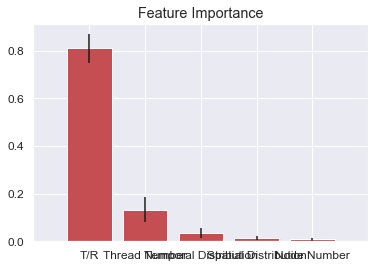

In [252]:
#Feature Importance
skplt.estimators.plot_feature_importances(
     clf_Rf, feature_names=['Node Number', 'Thread Number', 'Spatial Distribution',
       'Temporal Distribution', 'T/R'])
plt.show()

/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_learning_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_learning_curve instead.
  warnings.warn(msg, category=FutureWarning)


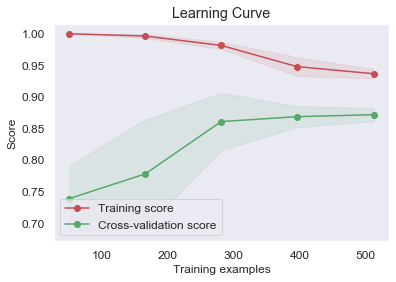

In [254]:
import scikitplot.plotters as skplt
skplt.plot_learning_curve(clf_Rf, X, y)

plt.show()

0.68359375
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        59
           1       0.50      0.64      0.56        14
           2       0.22      0.20      0.21        10
           3       0.47      0.44      0.45        16
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       1.00      0.80      0.89        25

    accuracy                           0.70       128
   macro avg       0.46      0.42      0.43       128
weighted avg       0.79      0.70      0.74       128

____________________________________________________________________________________________________


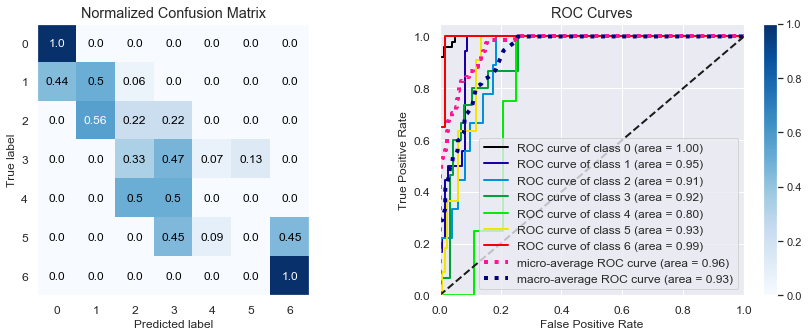

In [180]:
from sklearn.svm import SVC
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
clf_svc = SVC(kernel='linear', probability=True)
clf_svc.fit(X_train,y_train)
y_pred_svc=clf_svc.predict(X_test)
print(clf_svc.score(X_train,y_train))
print(classification_report(y_pred_svc,y_test))
print("_"*100)
y_probas = clf_svc.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svc, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        18
           2       0.89      1.00      0.94         8
           3       0.67      0.77      0.71        13
           4       0.50      0.25      0.33         8
           5       0.91      0.91      0.91        11
           6       0.95      1.00      0.97        19

    accuracy                           0.92       128
   macro avg       0.84      0.85      0.84       128
weighted avg       0.91      0.92      0.91       128

____________________________________________________________________________________________________
1.0


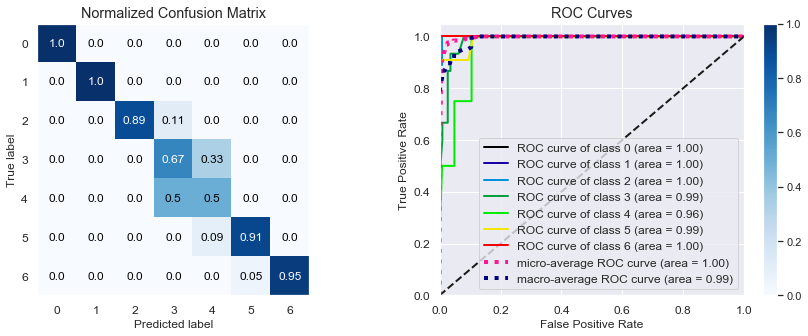

In [187]:
from sklearn.ensemble import BaggingClassifier
clf_b = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=100,,oob_score=True, random_state=0).fit(X_train,y_train)
y_pred_b=clf_b.predict(X_test)
print(classification_report(y_pred_b,y_test))
print("_"*100)
y_probas = clf_b.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_b, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
print(clf_b.score(X_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.89      1.00      0.94        16
           2       1.00      0.90      0.95        10
           3       0.73      0.79      0.76        14
           4       0.50      0.33      0.40         6
           5       0.91      0.83      0.87        12
           6       0.90      0.95      0.92        19

    accuracy                           0.91       128
   macro avg       0.85      0.83      0.83       128
weighted avg       0.91      0.91      0.91       128

____________________________________________________________________________________________________
1.0


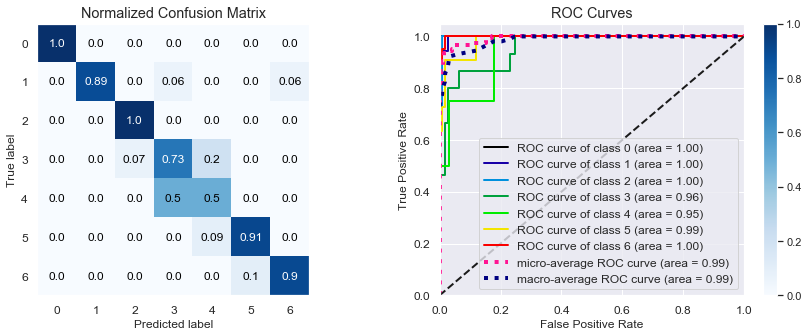

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(n_estimators=800, random_state=0).fit(X_train, y_train)
clf_GB.fit(X_train,y_train)
y_pred_GB=clf_GB.predict(X_test)
print(classification_report(y_pred_GB,y_test))
print("_"*100)
y_probas = clf_GB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_GB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
print(clf_GB.score(X_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9
           3       0.67      0.83      0.74        12
           4       0.50      0.25      0.33         8
           5       0.91      0.83      0.87        12
           6       0.90      1.00      0.95        18

    accuracy                           0.92       128
   macro avg       0.85      0.85      0.84       128
weighted avg       0.91      0.92      0.91       128

____________________________________________________________________________________________________
1.0


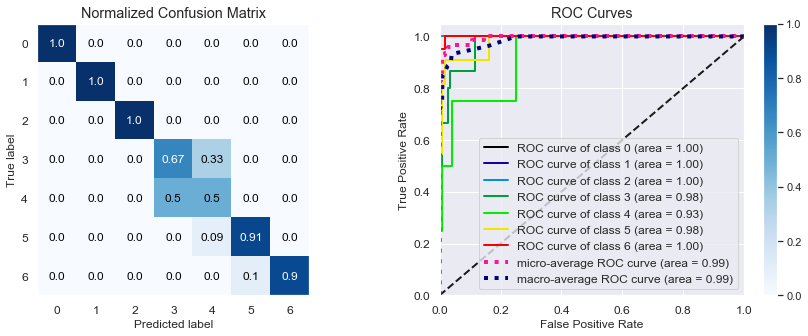

In [231]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
clf_HGB = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf_HGB.score(X_test, y_test)
y_pred_HGB=clf_HGB.predict(X_test)
print(classification_report(y_pred_HGB,y_test))
print("_"*100)
y_probas = clf_HGB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_HGB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
print(clf_HGB.score(X_train,y_train))

In [75]:
#pip install xgboost

In [76]:
#conda install -c conda-forge xgboost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9
           3       0.67      0.83      0.74        12
           4       0.50      0.22      0.31         9
           5       0.82      0.90      0.86        10
           6       0.95      1.00      0.97        19

    accuracy                           0.92       128
   macro avg       0.85      0.85      0.84       128
weighted avg       0.91      0.92      0.91       128

____________________________________________________________________________________________________


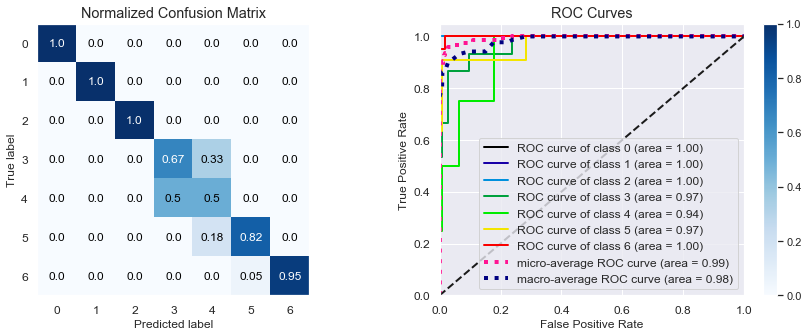

In [77]:

from xgboost import XGBClassifier
# fit model no training data
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred_XGB=model_XGB.predict(X_test)
print(classification_report(y_pred_XGB,y_test))
print("_"*100)
y_probas = model_XGB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_XGB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

0.5078125
              precision    recall  f1-score   support

           0       0.90      0.57      0.70        80
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.13      0.13      0.13        15
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.85      0.57      0.68        30

    accuracy                           0.51       128
   macro avg       0.27      0.18      0.22       128
weighted avg       0.78      0.51      0.61       128

____________________________________________________________________________________________________


/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


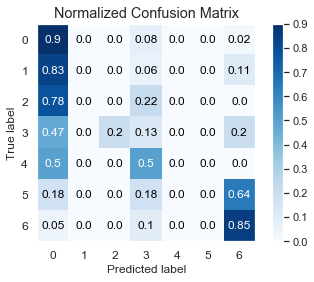

In [250]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = SVC()
clf.fit(X_t_train, y_train)
print ( clf.score(X_t_test, y_test))
#print ( clf.predict(X_t_test)
y_pred_PCC=clf.predict(X_t_test)
print(classification_report(y_pred_PCC,y_test))
print("_"*100)
#y_probas = clf.predict_proba(X_t_test)
#f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_PCC, normalize=True)
#skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

No handles with labels found to put in legend.


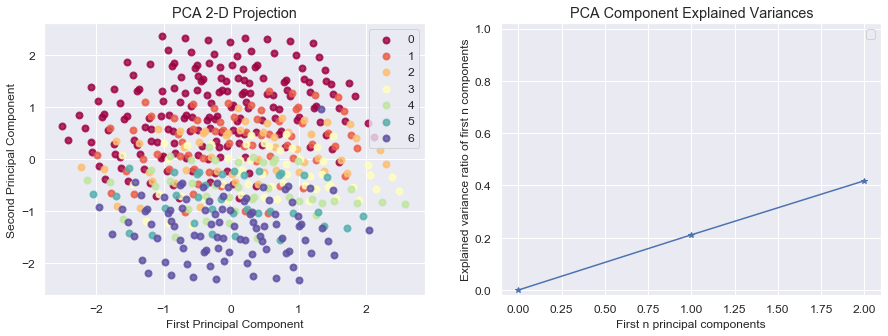

In [245]:
pca.fit(X_train)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.decomposition.plot_pca_2d_projection(pca, X_train, y_train,ax=axes[0])
skplt.decomposition.plot_pca_component_variance(pca,ax=axes[1])
plt.show()

In [246]:
pca.get_covariance()

array([[ 1.00480430e+00,  3.02747114e-02,  1.43710488e-02,
         1.97804401e-02, -1.43143747e-02],
       [ 3.02747114e-02,  1.02145695e+00,  9.02605611e-05,
         1.74217347e-02,  1.31523847e-02],
       [ 1.43710488e-02,  9.02605611e-05,  9.88227662e-01,
         9.71215146e-03, -2.42935363e-02],
       [ 1.97804401e-02,  1.74217347e-02,  9.71215146e-03,
         9.85033237e-01, -1.05031144e-02],
       [-1.43143747e-02,  1.31523847e-02, -2.42935363e-02,
        -1.05031144e-02,  1.01450422e+00]])

## Loading vector of the PCA

In [242]:
pca.components_

array([[-0.61153557, -0.58528081, -0.26898436, -0.37687294,  0.26283991],
       [ 0.01122875, -0.54739336,  0.37902519,  0.04187205, -0.74486312]])

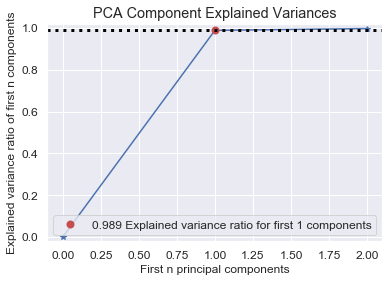

In [80]:
skplt.decomposition.plot_pca_component_variance(pca)

In [143]:
X = dataset[['Thread Number', 
        'T/R']]
y= dataset['channel_weight_labels']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

# Models Development For 2 Features from Feature selection


/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86        68
           1       0.11      0.33      0.17         6
           2       0.00      0.00      0.00         0
           3       0.73      0.55      0.63        20
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.59      0.74        34

    accuracy                           0.66       128
   macro avg       0.41      0.32      0.34       128
weighted avg       0.92      0.66      0.76       128

____________________________________________________________________________________________________
0.607421875


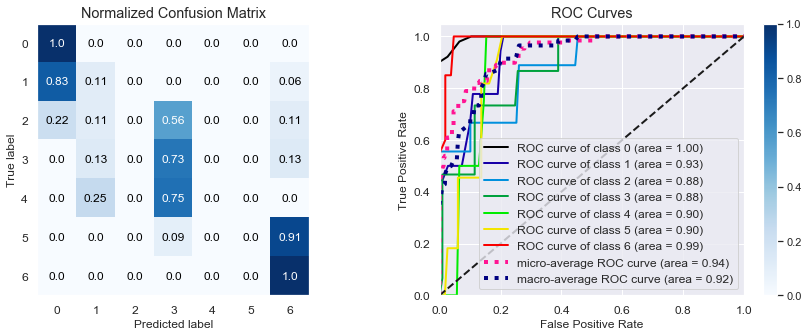

In [145]:
import scikitplot as skplt
# Logistic Regression - Basic
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)#fit(X_train, y_traindecision_function(X_test)

print(classification_report(y_pred,y_test))
print("_"*100)
y_probas = model.predict_proba(X_test)

print(model.score(X_train,y_train))
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

plt.show()



              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.89      0.70      0.78        23
           2       0.67      0.67      0.67         9
           3       0.67      0.77      0.71        13
           4       0.00      0.00      0.00         5
           5       0.18      0.67      0.29         3
           6       0.95      0.73      0.83        26

    accuracy                           0.78       128
   macro avg       0.61      0.64      0.60       128
weighted avg       0.82      0.78      0.79       128

____________________________________________________________________________________________________


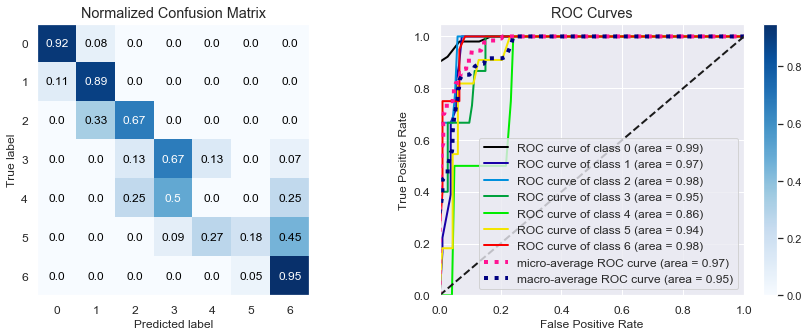

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_2 = LDA()


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=45, shuffle=True)
model_2.fit(X_train,y_train)
y_pred_2=model_2.predict(X_test)

print(classification_report(y_pred_2,y_test))
print("_"*100)
y_probas = model_2.predict_proba(X_test)


f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_2, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.83      0.71      0.77        21
           2       0.78      0.88      0.82         8
           3       0.87      0.87      0.87        15
           4       0.50      0.25      0.33         8
           5       0.55      0.55      0.55        11
           6       0.75      0.94      0.83        16

    accuracy                           0.82       128
   macro avg       0.74      0.74      0.73       128
weighted avg       0.81      0.82      0.81       128

____________________________________________________________________________________________________


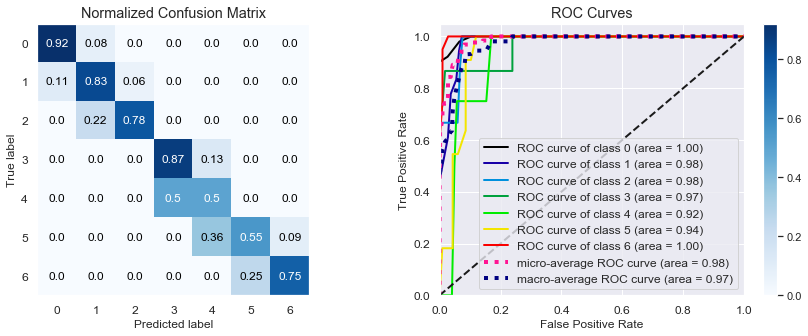

In [147]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_3 = QDA()
model_3.fit(X_train,y_train)
y_pred_3=model_3.predict(X_test)
print(classification_report(y_pred_3,y_test))
print("_"*100)
y_probas = model_3.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_3, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

0.861328125
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.89      0.76      0.82        21
           2       1.00      0.82      0.90        11
           3       0.87      0.87      0.87        15
           4       0.50      0.40      0.44         5
           5       0.82      0.90      0.86        10
           6       0.95      0.95      0.95        20

    accuracy                           0.89       128
   macro avg       0.85      0.81      0.83       128
weighted avg       0.89      0.89      0.89       128

____________________________________________________________________________________________________


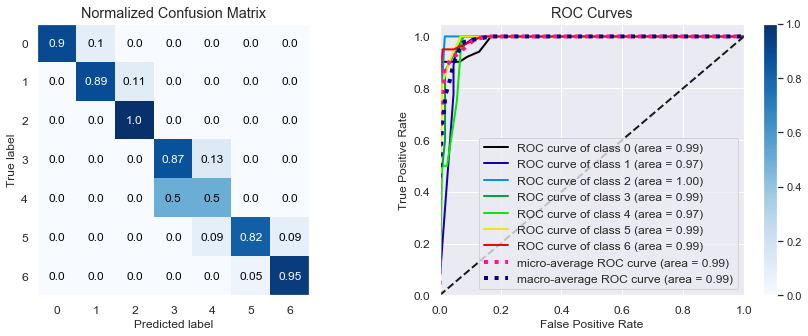

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from random import shuffle
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
neighb = KNeighborsClassifier(n_neighbors=17)
neighb.fit(X_train,y_train)
y_pred_4=neighb.predict(X_test)
print(neighb.score(X_train,y_train))
print(classification_report(y_pred_4,y_test))
print("_"*100)
y_probas = neighb.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_4, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.89      0.76      0.82        21
           2       1.00      0.82      0.90        11
           3       0.87      0.87      0.87        15
           4       0.50      0.40      0.44         5
           5       0.82      0.90      0.86        10
           6       0.95      0.95      0.95        20

    accuracy                           0.89       128
   macro avg       0.85      0.81      0.83       128
weighted avg       0.89      0.89      0.89       128



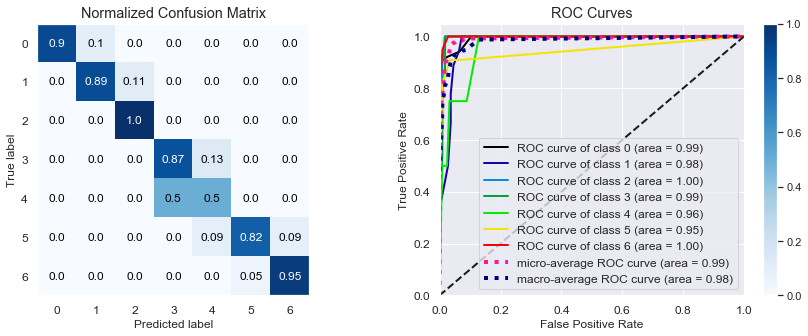

In [149]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_t=clf.predict(X_test)
print(classification_report(y_pred_t,y_test))
y_probas = clf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_t, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
#tree.plot_tree(clf.fit(X, y))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.89      0.76      0.82        21
           2       1.00      0.82      0.90        11
           3       0.87      0.87      0.87        15
           4       0.50      0.40      0.44         5
           5       0.82      0.90      0.86        10
           6       0.95      0.95      0.95        20

    accuracy                           0.89       128
   macro avg       0.85      0.81      0.83       128
weighted avg       0.89      0.89      0.89       128

____________________________________________________________________________________________________


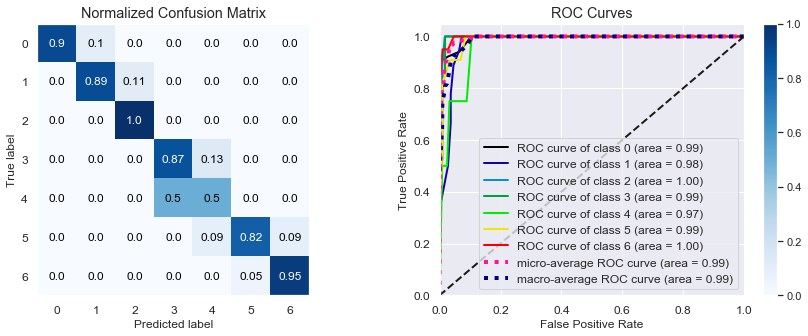

In [167]:
from sklearn.ensemble import BaggingClassifier
clf_b = BaggingClassifier(base_estimator=RandomForestClassifier(),
                        n_estimators=150, random_state=0).fit(X_train,y_train)
y_pred_b=clf_b.predict(X_test)
print(classification_report(y_pred_b,y_test))
print("_"*100)
y_probas = clf_b.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_b, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.89      0.76      0.82        21
           2       1.00      0.82      0.90        11
           3       0.87      0.87      0.87        15
           4       0.50      0.40      0.44         5
           5       0.82      0.90      0.86        10
           6       0.95      0.95      0.95        20

    accuracy                           0.89       128
   macro avg       0.85      0.81      0.83       128
weighted avg       0.89      0.89      0.89       128

____________________________________________________________________________________________________


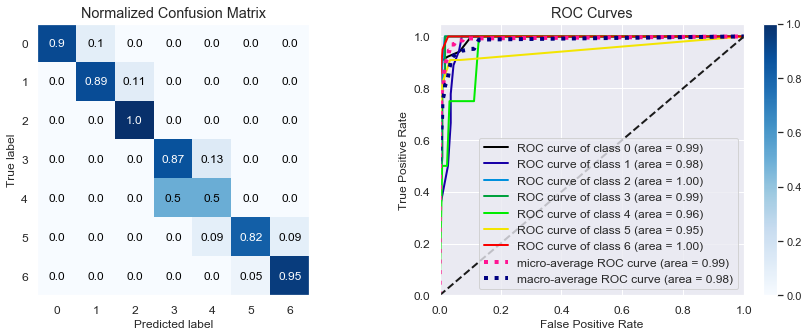

In [151]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_Rf = RandomForestClassifier( random_state=25)
clf_Rf.fit(X_train,y_train)
y_pred_Rf=clf_Rf.predict(X_test)
print(classification_report(y_pred_Rf,y_test))
print("_"*100)
y_probas = clf_Rf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_Rf, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.89      0.76      0.82        21
           2       1.00      0.82      0.90        11
           3       0.87      0.87      0.87        15
           4       0.50      0.40      0.44         5
           5       0.82      0.90      0.86        10
           6       0.95      0.95      0.95        20

    accuracy                           0.89       128
   macro avg       0.85      0.81      0.83       128
weighted avg       0.89      0.89      0.89       128

____________________________________________________________________________________________________


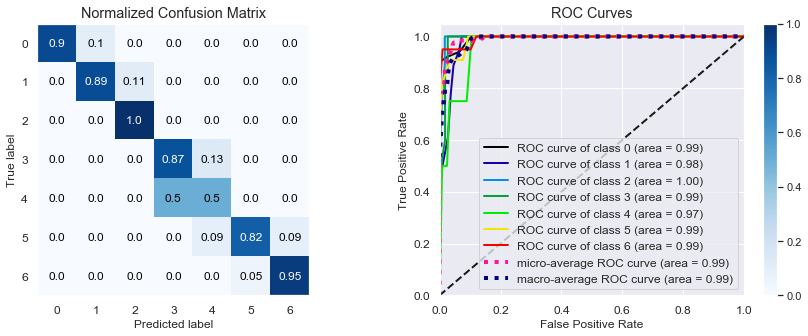

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
clf_GB.fit(X_train,y_train)
y_pred_GB=clf_GB.predict(X_test)
print(classification_report(y_pred_GB,y_test))
print("_"*100)
y_probas = clf_GB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_GB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

0.6640625
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        59
           1       0.44      0.67      0.53        12
           2       0.56      0.45      0.50        11
           3       0.47      0.47      0.47        15
           4       0.25      0.33      0.29         3
           5       0.00      0.00      0.00         2
           6       1.00      0.77      0.87        26

    accuracy                           0.72       128
   macro avg       0.53      0.51      0.51       128
weighted avg       0.81      0.72      0.76       128

____________________________________________________________________________________________________


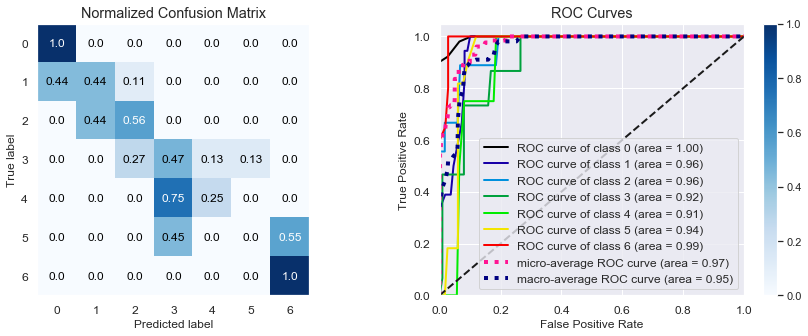

In [153]:
from sklearn.svm import SVC
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
clf_svc = SVC(kernel='linear', probability=True)
clf_svc.fit(X_train,y_train)
y_pred_svc=clf_svc.predict(X_test)
print(clf_svc.score(X_train,y_train))
print(classification_report(y_pred_svc,y_test))
print("_"*100)
y_probas = clf_svc.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svc, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.89      0.76      0.82        21
           2       1.00      0.82      0.90        11
           3       0.87      0.87      0.87        15
           4       0.50      0.40      0.44         5
           5       0.82      0.90      0.86        10
           6       0.95      0.95      0.95        20

    accuracy                           0.89       128
   macro avg       0.85      0.81      0.83       128
weighted avg       0.89      0.89      0.89       128

____________________________________________________________________________________________________


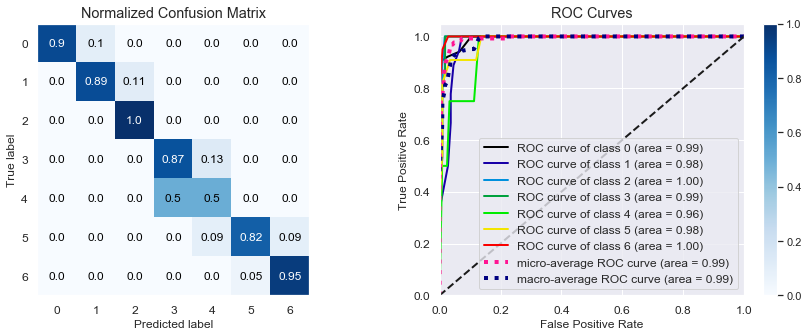

In [154]:

from xgboost import XGBClassifier
# fit model no training data
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred_XGB=model_XGB.predict(X_test)
print(classification_report(y_pred_XGB,y_test))
print("_"*100)
y_probas = model_XGB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_XGB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

0.5859375
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        70
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         2
           3       0.47      0.54      0.50        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           6       0.85      0.63      0.72        27

    accuracy                           0.59       128
   macro avg       0.33      0.27      0.30       128
weighted avg       0.77      0.59      0.66       128

____________________________________________________________________________________________________


/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


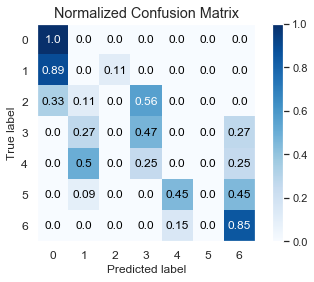

In [155]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = SVC()  
clf.fit(X_t_train, y_train)
print ( clf.score(X_t_test, y_test))
#print ( clf.predict(X_t_test)
y_pred_PCC=clf.predict(X_t_test)
print(classification_report(y_pred_PCC,y_test))
print("_"*100)
#y_probas = clf.predict_proba(X_t_test)
#f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_PCC, normalize=True)
#skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

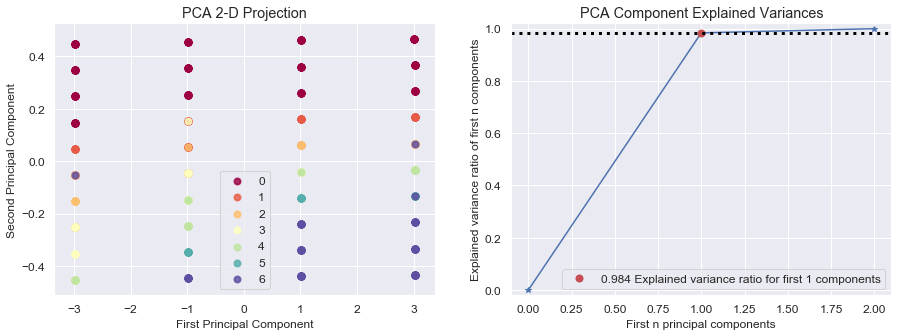

In [156]:
pca.fit(X_train)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.decomposition.plot_pca_2d_projection(pca, X_train, y_train,ax=axes[0])
skplt.decomposition.plot_pca_component_variance(pca,ax=axes[1])
plt.show()

# Processor Utilization as OUTPUT

count    640.000000
mean       0.649013
std        0.194737
min        0.202377
25%        0.492530
50%        0.624787
75%        0.833106
max        0.986516
Name: Processor Utilization, dtype: float64

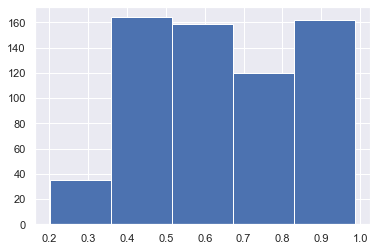

In [93]:
dataset['Processor Utilization'].hist(bins=5)
dataset['Processor Utilization'].min()
dataset['Processor Utilization'].describe()


## Converting into classification

In [94]:
Process_labels={0.36:0,0.52:1,0.66:2,0.82:3,1.0:4}

dataset['Processor_labels']=dataset['Processor Utilization']
for i in range(len(dataset)):
    dataset['Processor_labels'][i]=int(-1)
#plt.figure(figsize=(20,25))
#channel_weight_thresholds={160:0,320:1,480:2,640:3,800:4,960:5,1120:6,1300:7}
for threshold in Process_labels:
    #threshold_indices= dataset[dataset['Processor Utilization'] <=threshold].index
    #dataset[threshold_indices]['Process_labels']=Process_labels[threshold]
    dataset['Processor_labels'] = [Process_labels[threshold] if (x <=threshold and y==-1) else y for x,y in zip(dataset['Processor Utilization'],dataset['Processor_labels'])]


/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


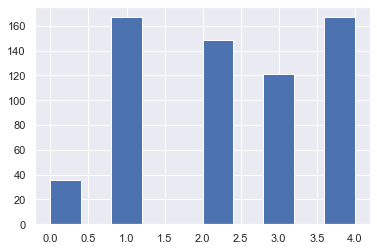

In [95]:
dataset['Processor_labels'].hist()

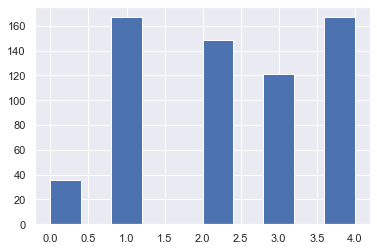

In [96]:
dataset['Processor_labels'].hist()

In [97]:
dataset['Processor_labels']


0      4.0
1      4.0
2      3.0
3      3.0
4      3.0
      ... 
635    3.0
636    3.0
637    2.0
638    2.0
639    1.0
Name: Processor_labels, Length: 640, dtype: float64

In [98]:
dataset['Processor Utilization']

0      0.839546
1      0.827412
2      0.802605
3      0.723403
4      0.721210
         ...   
635    0.792340
636    0.707199
637    0.618230
638    0.564482
639    0.515257
Name: Processor Utilization, Length: 640, dtype: float64

In [99]:
X = dataset[['Node Number', 'Thread Number', 'Spatial Distribution',
       'Temporal Distribution', 'T/R']]
y = dataset['Processor_labels']

In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)



In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
X_train.shape

(512, 5)

              precision    recall  f1-score   support

         0.0       0.30      0.75      0.43         4
         1.0       0.68      0.49      0.57        39
         2.0       0.44      0.56      0.49        25
         3.0       0.50      0.50      0.50        22
         4.0       0.72      0.68      0.70        38

    accuracy                           0.57       128
   macro avg       0.53      0.60      0.54       128
weighted avg       0.60      0.57      0.58       128

____________________________________________________________________________________________________


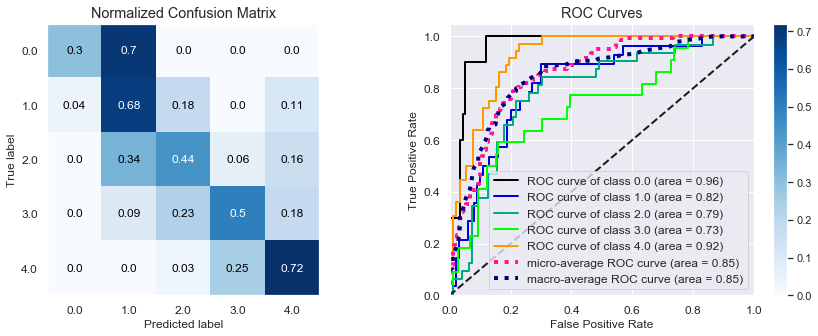

In [102]:
import scikitplot as skplt
# Logistic Regression - Basic
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)#fit(X_train, y_traindecision_function(X_test)

print(classification_report(y_pred,y_test))
print("_"*100)
y_probas = model.predict_proba(X_test)


f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

plt.show()


              precision    recall  f1-score   support

         0.0       0.30      0.75      0.43         4
         1.0       0.64      0.47      0.55        38
         2.0       0.47      0.58      0.52        26
         3.0       0.45      0.50      0.48        20
         4.0       0.72      0.65      0.68        40

    accuracy                           0.56       128
   macro avg       0.52      0.59      0.53       128
weighted avg       0.59      0.56      0.57       128

____________________________________________________________________________________________________


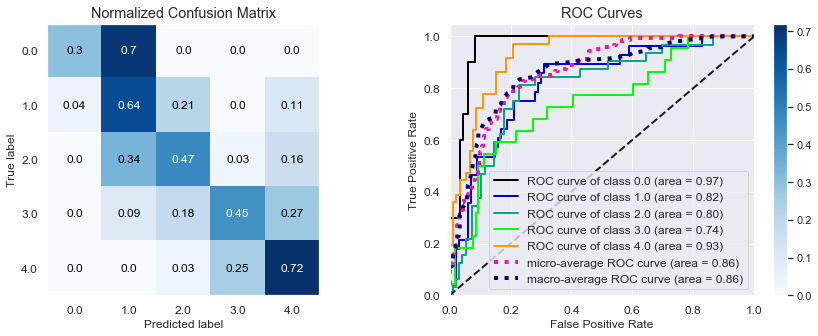

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_2 = LDA()


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=45, shuffle=True)
model_2.fit(X_train,y_train)
y_pred_2=model_2.predict(X_test)

print(classification_report(y_pred_2,y_test))
print("_"*100)
y_probas = model_2.predict_proba(X_test)


f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_2, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         8
         1.0       0.61      0.47      0.53        36
         2.0       0.28      0.43      0.34        21
         3.0       0.59      0.46      0.52        28
         4.0       0.75      0.77      0.76        35

    accuracy                           0.56       128
   macro avg       0.57      0.58      0.56       128
weighted avg       0.59      0.56      0.57       128

____________________________________________________________________________________________________


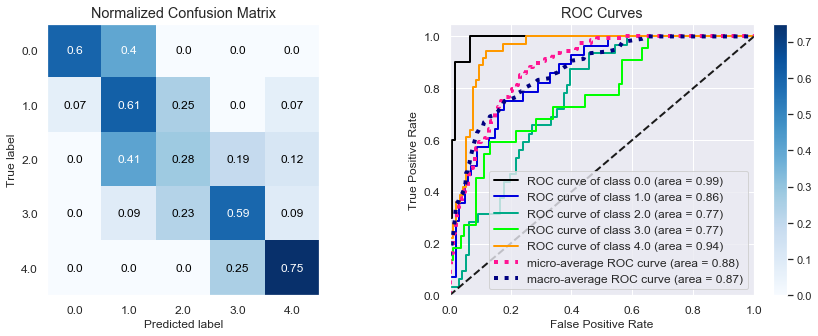

In [104]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_3 = QDA()
model_3.fit(X_train,y_train)
y_pred_3=model_3.predict(X_test)
print(classification_report(y_pred_3,y_test))
print("_"*100)
y_probas = model_3.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_3, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82         7
         1.0       0.89      0.64      0.75        39
         2.0       0.62      0.67      0.65        30
         3.0       0.59      0.65      0.62        20
         4.0       0.83      0.94      0.88        32

    accuracy                           0.74       128
   macro avg       0.73      0.78      0.74       128
weighted avg       0.76      0.74      0.74       128

____________________________________________________________________________________________________


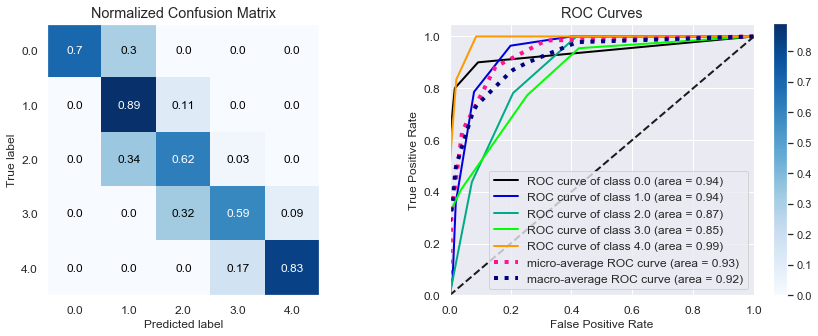

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from random import shuffle
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
neighb = KNeighborsClassifier(n_neighbors=5)
neighb.fit(X_train,y_train)
y_pred_4=neighb.predict(X_test)
print(classification_report(y_pred_4,y_test))
print("_"*100)
y_probas = neighb.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_4, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.75      0.78      0.76        27
         2.0       0.88      0.85      0.86        33
         3.0       0.86      0.79      0.83        24
         4.0       0.89      0.94      0.91        34

    accuracy                           0.84       128
   macro avg       0.82      0.81      0.81       128
weighted avg       0.84      0.84      0.84       128



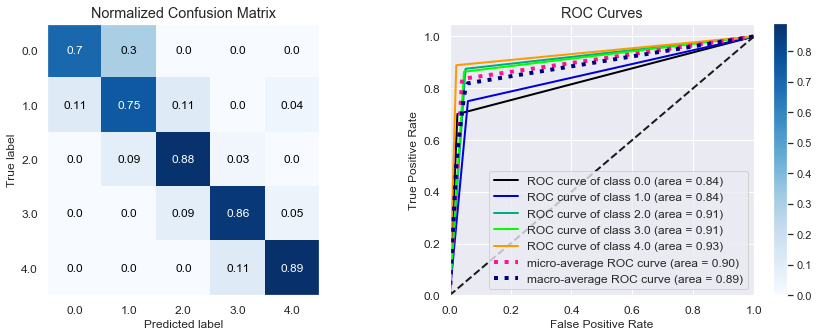

In [106]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_t=clf.predict(X_test)
print(classification_report(y_pred_t,y_test))
y_probas = clf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_t, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
#tree.plot_tree(clf.fit(X, y))

In [107]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("process")

'process.pdf'

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.93      0.76      0.84        34
         2.0       0.88      0.88      0.88        32
         3.0       0.82      0.86      0.84        21
         4.0       0.92      0.94      0.93        35

    accuracy                           0.87       128
   macro avg       0.83      0.89      0.85       128
weighted avg       0.88      0.87      0.87       128

____________________________________________________________________________________________________


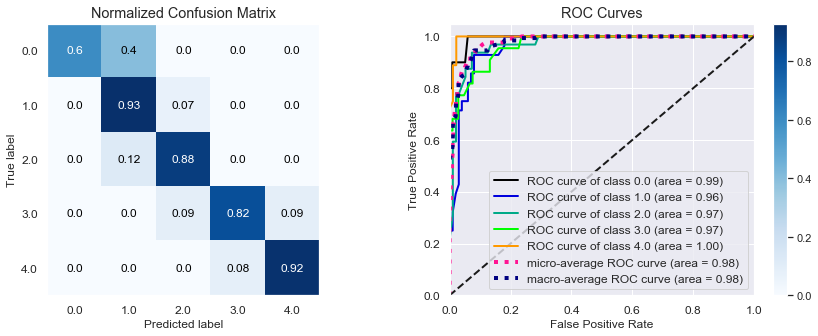

In [108]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_Rf = RandomForestClassifier( random_state=25)
clf_Rf.fit(X_train,y_train)
y_pred_Rf=clf_Rf.predict(X_test)
print(classification_report(y_pred_Rf,y_test))
print("_"*100)
y_probas = clf_Rf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_Rf, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


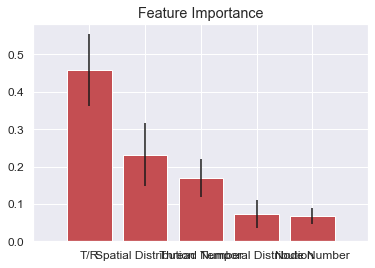

In [109]:
skplt.estimators.plot_feature_importances(
     clf_Rf, feature_names=['Node Number', 'Thread Number', 'Spatial Distribution',
       'Temporal Distribution', 'T/R'])
plt.show()

              precision    recall  f1-score   support

         0.0       0.30      0.75      0.43         4
         1.0       0.93      0.58      0.71        45
         2.0       0.50      0.73      0.59        22
         3.0       0.59      0.76      0.67        17
         4.0       0.89      0.80      0.84        40

    accuracy                           0.70       128
   macro avg       0.64      0.72      0.65       128
weighted avg       0.78      0.70      0.72       128

____________________________________________________________________________________________________


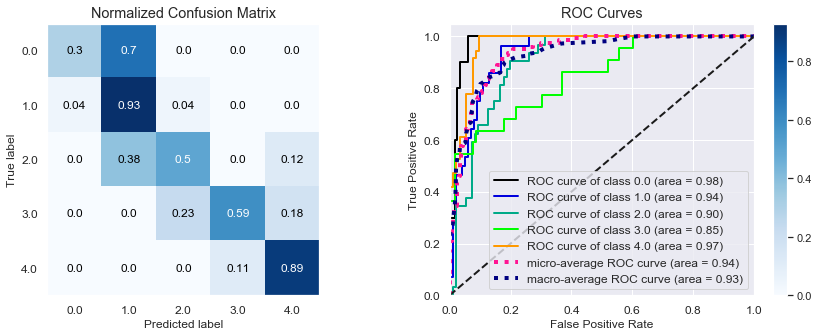

In [110]:
from sklearn.svm import SVC
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
clf_svc = SVC(kernel='rbf', probability=True)
clf_svc.fit(X_train,y_train)
y_pred_svc=clf_svc.predict(X_test)
print(classification_report(y_pred_svc,y_test))
print("_"*100)
y_probas = clf_svc.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svc, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

         0.0       0.30      1.00      0.46         3
         1.0       0.79      0.59      0.68        37
         2.0       0.53      0.59      0.56        29
         3.0       0.50      0.65      0.56        17
         4.0       0.97      0.83      0.90        42

    accuracy                           0.69       128
   macro avg       0.62      0.73      0.63       128
weighted avg       0.74      0.69      0.70       128

____________________________________________________________________________________________________


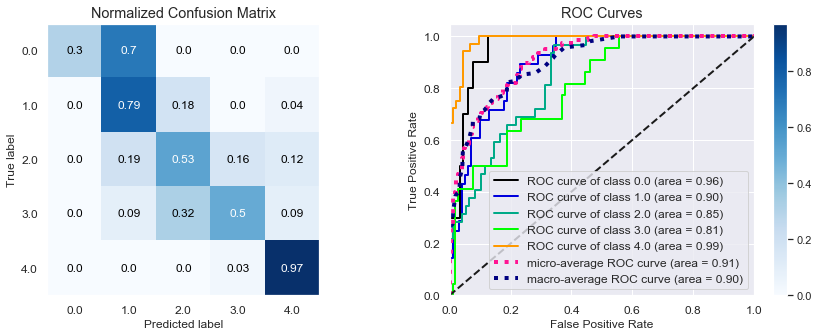

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(n_estimators=90, learning_rate=.3,
     max_depth=1, random_state=45).fit(X_train, y_train)
clf_GB.fit(X_train,y_train)
y_pred_GB=clf_GB.predict(X_test)
print(classification_report(y_pred_GB,y_test))
print("_"*100)
y_probas = clf_GB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_GB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

         0.0       0.30      0.75      0.43         4
         1.0       0.68      0.49      0.57        39
         2.0       0.44      0.56      0.49        25
         3.0       0.50      0.50      0.50        22
         4.0       0.72      0.68      0.70        38

    accuracy                           0.57       128
   macro avg       0.53      0.60      0.54       128
weighted avg       0.60      0.57      0.58       128

____________________________________________________________________________________________________


0.7734375

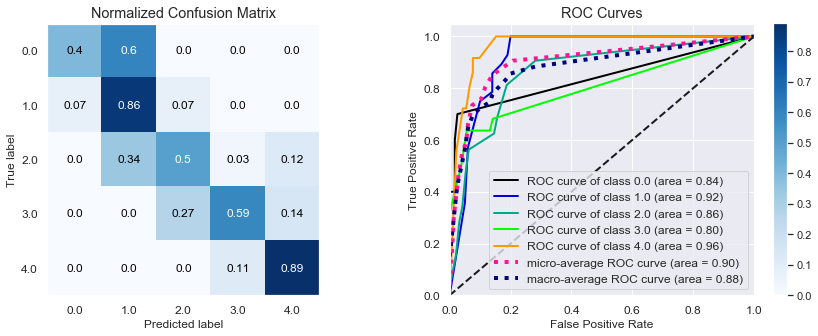

In [112]:
from sklearn.ensemble import BaggingClassifier
clf_b = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train,y_train)
y_pred_b=clf_b.predict(X_test)
print(classification_report(y_pred,y_test))
print("_"*100)
y_probas = clf_b.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_b, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
clf_b.score(X_train, y_train)

              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78         8
         1.0       0.93      0.79      0.85        33
         2.0       0.84      0.90      0.87        30
         3.0       0.86      0.86      0.86        22
         4.0       0.94      0.97      0.96        35

    accuracy                           0.88       128
   macro avg       0.86      0.88      0.86       128
weighted avg       0.89      0.88      0.88       128

____________________________________________________________________________________________________


0.99609375

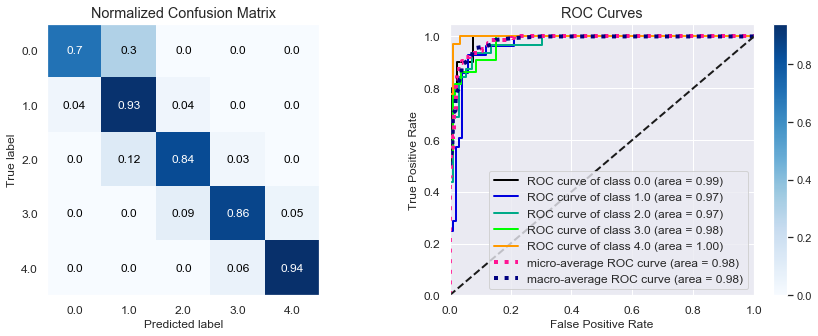

In [113]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
clf_HGB = HistGradientBoostingClassifier(max_iter=91).fit(X_train, y_train)
clf_HGB.score(X_test, y_test)
y_pred_HGB=clf_HGB.predict(X_test)
print(classification_report(y_pred_HGB,y_test))
print("_"*100)
y_probas = clf_HGB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_HGB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
clf_HGB.score(X_train, y_train)

0.3671875
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.64      0.38      0.48        47
         2.0       0.03      0.17      0.05         6
         3.0       0.23      0.18      0.20        28
         4.0       0.64      0.49      0.55        47

    accuracy                           0.37       128
   macro avg       0.31      0.24      0.26       128
weighted avg       0.52      0.37      0.43       128

____________________________________________________________________________________________________


/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


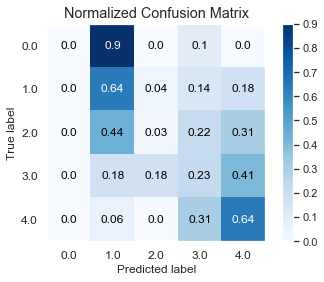

In [114]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = SVC()  
clf.fit(X_t_train, y_train)
print ( clf.score(X_t_test, y_test))
#print ( clf.predict(X_t_test)
y_pred_PCC=clf.predict(X_t_test)
print(classification_report(y_pred_PCC,y_test))
print("_"*100)
#y_probas = clf.predict_proba(X_t_test)
#f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_PCC, normalize=True)
#skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.93      0.79      0.85        33
         2.0       0.91      0.88      0.89        33
         3.0       0.86      0.83      0.84        23
         4.0       0.89      0.97      0.93        33

    accuracy                           0.88       128
   macro avg       0.84      0.89      0.85       128
weighted avg       0.89      0.88      0.88       128

____________________________________________________________________________________________________


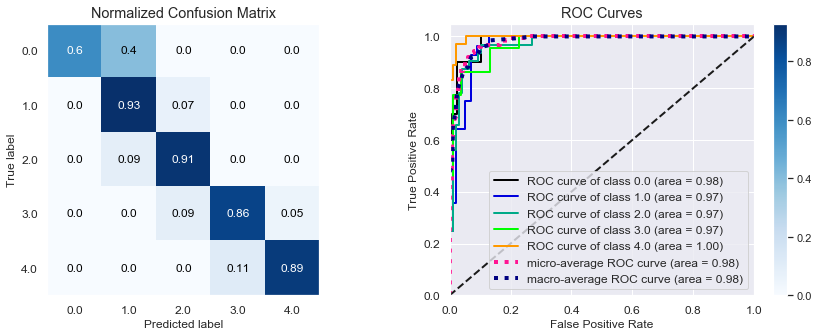

In [115]:

from xgboost import XGBClassifier
# fit model no training data
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred_XGB=model_XGB.predict(X_test)
print(classification_report(y_pred_XGB,y_test))
print("_"*100)
y_probas = model_XGB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_XGB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

## Network response time as OUTPUT

6065.736672

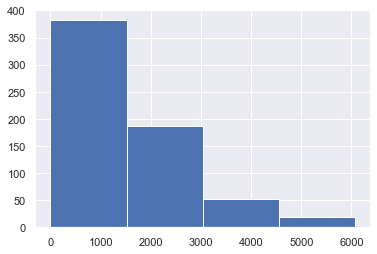

In [116]:
dataset['Network Response Time'].hist(bins=4)
dataset['Network Response Time'].max()

In [117]:
Network_thresholds={1500:0,3000:1,4500:2,6066:3}

dataset['Network_Response_labels']=dataset['Network Response Time']
for i in range(len(dataset)):
    dataset['Network_Response_labels'][i]=int(-1)

for treshold in Network_thresholds:
    #dataset['Network_Response_labels'] = [Network_thresholds[threshold] if (x <=threshold and y==-1) else y for x,y in zip(dataset['Network Response Time'],dataset['Network_Response_labels'])]
    dataset['Network_Response_labels'] = [int(np.round(np.round(x)/1500)) if np.round(x)/1500<3 else 3 for x in dataset['Network Response Time']]


/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


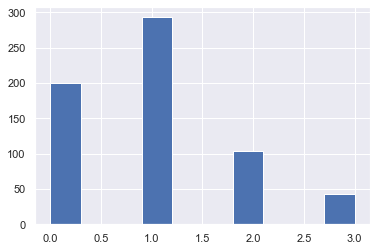

In [118]:
dataset['Network_Response_labels'].hist()

In [119]:
X_data= dataset[['Node Number', 'Thread Number', 'Spatial Distribution',
       'Temporal Distribution', 'T/R']]
y_data = dataset['Network_Response_labels']

In [120]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_data=scaler.fit_transform(X_data)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.10, random_state=45)
X_train.shape
y_test.shape
#y_probas.shape

(64,)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.91      0.59      0.71        34
           2       0.46      0.67      0.55         9
           3       0.33      1.00      0.50         1

    accuracy                           0.70        64
   macro avg       0.60      0.79      0.64        64
weighted avg       0.77      0.70      0.71        64

____________________________________________________________________________________________________


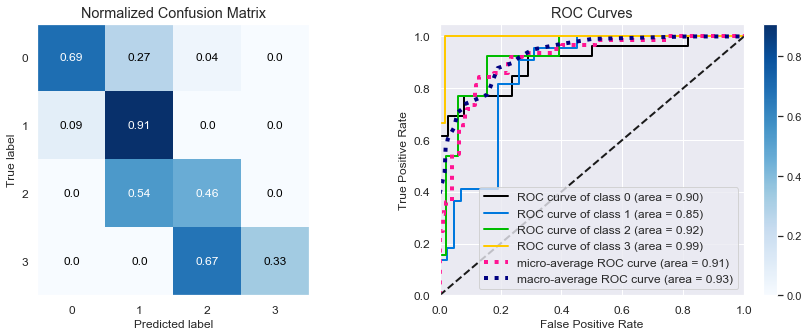

In [122]:
import scikitplot as skplt
# Logistic Regression - Basic
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)#fit(X_train, y_traindecision_function(X_test)

print(classification_report(y_pred,y_test))
print("_"*100)
y_probas = model.predict_proba(X_test)


f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

plt.show()


              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.95      0.64      0.76        33
           2       0.46      0.86      0.60         7
           3       0.67      1.00      0.80         2

    accuracy                           0.78        64
   macro avg       0.72      0.86      0.76        64
weighted avg       0.84      0.78      0.79        64

____________________________________________________________________________________________________


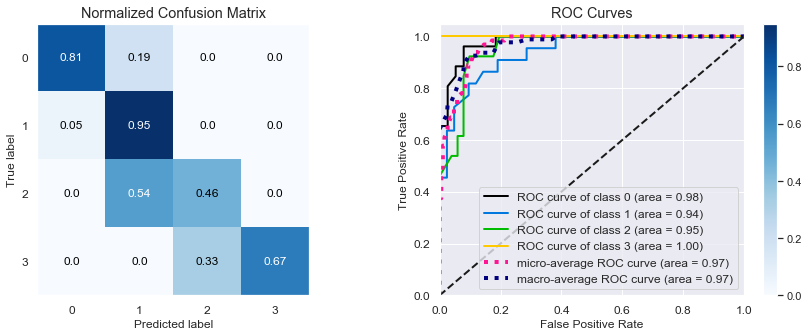

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_Rf = RandomForestClassifier( random_state=25)
clf_Rf.fit(X_train,y_train)
y_pred_Rf=clf_Rf.predict(X_test)
print(classification_report(y_pred_Rf,y_test))
print("_"*100)
y_probas = clf_Rf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_Rf, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        19
           1       0.95      0.64      0.76        33
           2       0.62      0.73      0.67        11
           3       0.33      1.00      0.50         1

    accuracy                           0.75        64
   macro avg       0.65      0.83      0.68        64
weighted avg       0.81      0.75      0.75        64

____________________________________________________________________________________________________


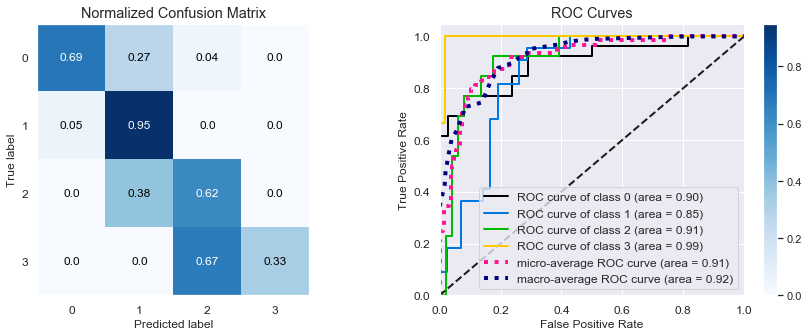

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_2 = LDA()


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=45, shuffle=True)
model_2.fit(X_train,y_train)
y_pred_2=model_2.predict(X_test)

print(classification_report(y_pred_2,y_test))
print("_"*100)
y_probas = model_2.predict_proba(X_test)


f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_2, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.95      0.66      0.78        32
           2       0.54      1.00      0.70         7
           3       1.00      1.00      1.00         3

    accuracy                           0.81        64
   macro avg       0.83      0.90      0.84        64
weighted avg       0.86      0.81      0.81        64

____________________________________________________________________________________________________


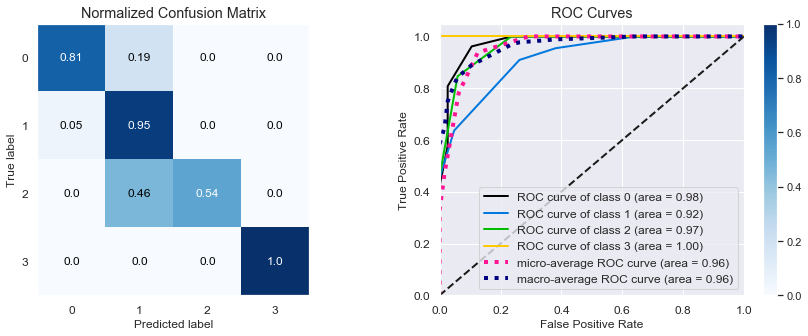

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from random import shuffle
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
neighb = KNeighborsClassifier(n_neighbors=5)
neighb.fit(X_train,y_train)
y_pred_4=neighb.predict(X_test)
print(classification_report(y_pred_4,y_test))
print("_"*100)
y_probas = neighb.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_4, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.95      0.70      0.81        30
           2       0.69      0.82      0.75        11
           3       0.33      1.00      0.50         1

    accuracy                           0.81        64
   macro avg       0.70      0.87      0.73        64
weighted avg       0.85      0.81      0.82        64



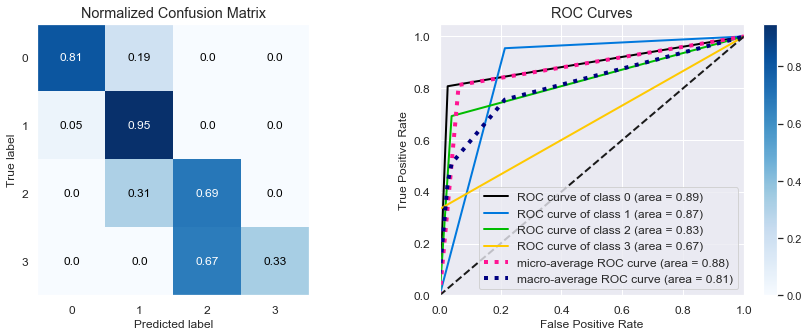

In [126]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_t=clf.predict(X_test)
print(classification_report(y_pred_t,y_test))
y_probas = clf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_t, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
#tree.plot_tree(clf.fit(X, y))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.95      0.64      0.76        33
           2       0.46      0.86      0.60         7
           3       0.67      1.00      0.80         2

    accuracy                           0.78        64
   macro avg       0.72      0.86      0.76        64
weighted avg       0.84      0.78      0.79        64

____________________________________________________________________________________________________


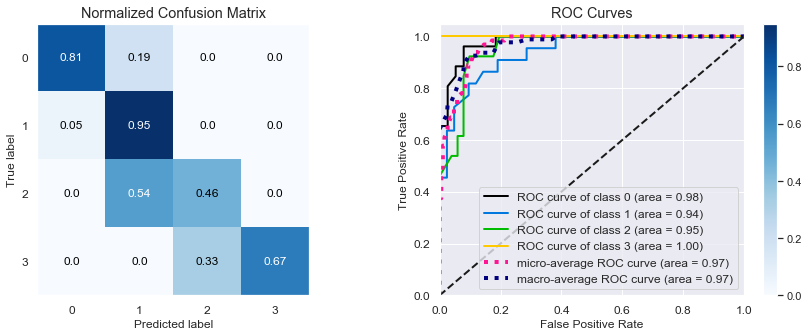

In [127]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_Rf = RandomForestClassifier( random_state=25)
clf_Rf.fit(X_train,y_train)
y_pred_Rf=clf_Rf.predict(X_test)
print(classification_report(y_pred_Rf,y_test))
print("_"*100)
y_probas = clf_Rf.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_Rf, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])


              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.65      0.79        34
           2       0.54      0.78      0.64         9
           3       0.67      1.00      0.80         2

    accuracy                           0.78        64
   macro avg       0.73      0.86      0.77        64
weighted avg       0.84      0.78      0.78        64

____________________________________________________________________________________________________


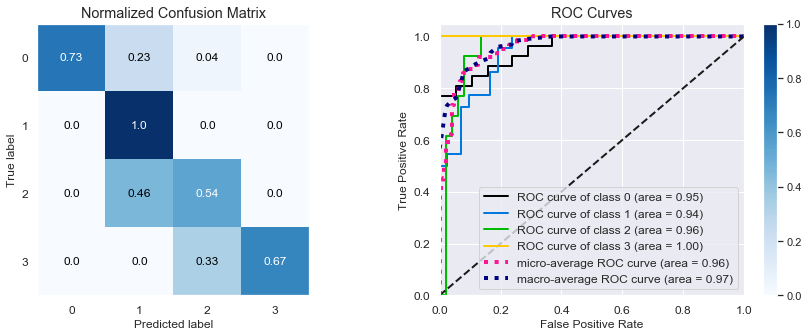

In [128]:
from sklearn.svm import SVC
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=45)
clf_svc = SVC(kernel='rbf', probability=True,random_state=45)
clf_svc.fit(X_train,y_train)
y_pred_svc=clf_svc.predict(X_test)
print(classification_report(y_pred_svc,y_test))
print("_"*100)
y_probas = clf_svc.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svc, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.63      0.77        35
           2       0.38      0.71      0.50         7
           3       0.33      1.00      0.50         1

    accuracy                           0.77        64
   macro avg       0.63      0.84      0.67        64
weighted avg       0.86      0.77      0.78        64

____________________________________________________________________________________________________


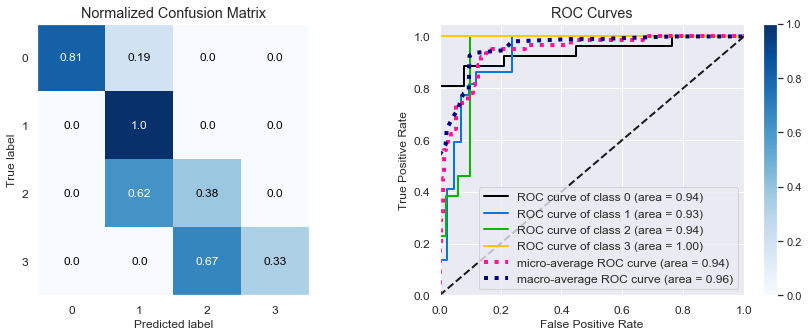

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=.3,
     max_depth=1, random_state=0).fit(X_train, y_train)
clf_GB.fit(X_train,y_train)
y_pred_GB=clf_GB.predict(X_test)
print(classification_report(y_pred_GB,y_test))
print("_"*100)
y_probas = clf_GB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_GB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.95      0.78      0.86        27
           2       0.77      0.91      0.83        11
           3       0.67      1.00      0.80         2

    accuracy                           0.88        64
   macro avg       0.82      0.91      0.85        64
weighted avg       0.89      0.88      0.87        64

____________________________________________________________________________________________________


0.9947916666666666

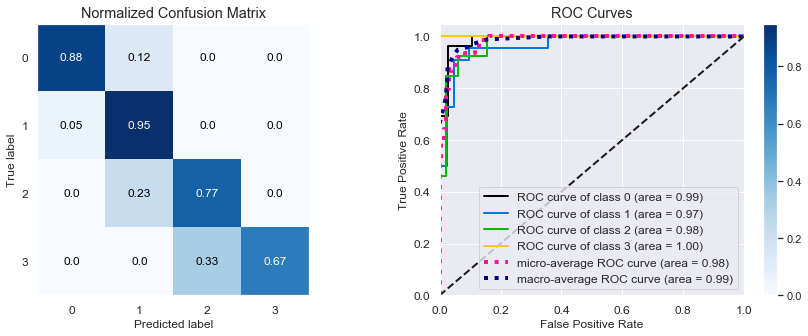

In [130]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
clf_HGB = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf_HGB.score(X_test, y_test)
y_pred_HGB=clf_HGB.predict(X_test)
print(classification_report(y_pred_HGB,y_test))
print("_"*100)
y_probas = clf_HGB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_HGB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
clf_HGB.score(X_train, y_train)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.91      0.59      0.71        34
           2       0.46      0.67      0.55         9
           3       0.33      1.00      0.50         1

    accuracy                           0.70        64
   macro avg       0.60      0.79      0.64        64
weighted avg       0.77      0.70      0.71        64

____________________________________________________________________________________________________


0.8368055555555556

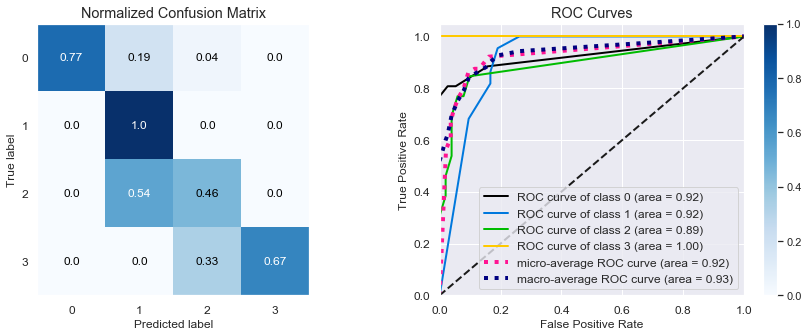

In [131]:
from sklearn.ensemble import BaggingClassifier
clf_b = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=25).fit(X_train,y_train)
y_pred_b=clf_b.predict(X_test)
print(classification_report(y_pred,y_test))
print("_"*100)
y_probas = clf_b.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_b, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])
clf_b.score(X_train, y_train)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.95      0.78      0.86        27
           2       0.69      0.82      0.75        11
           3       0.33      1.00      0.50         1

    accuracy                           0.86        64
   macro avg       0.73      0.89      0.76        64
weighted avg       0.89      0.86      0.87        64

____________________________________________________________________________________________________


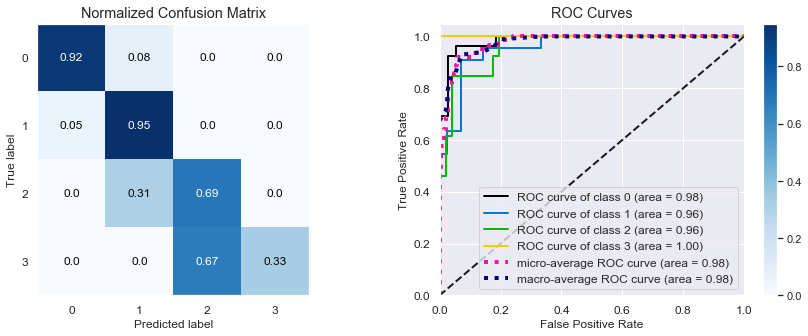

In [132]:
from xgboost import XGBClassifier
# fit model no training data
model_XGB = XGBClassifier(  )

model_XGB.fit(X_train, y_train)
y_pred_XGB=model_XGB.predict(X_test)
print(classification_report(y_pred_XGB,y_test))
print("_"*100)
y_probas = model_XGB.predict_proba(X_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_XGB, normalize=True,ax=axes[0])
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])

0.484375
              precision    recall  f1-score   support

           0       0.58      0.71      0.64        21
           1       0.73      0.38      0.50        42
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.48        64
   macro avg       0.33      0.27      0.28        64
weighted avg       0.67      0.48      0.54        64

____________________________________________________________________________________________________


/Users/priyankakondaparthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


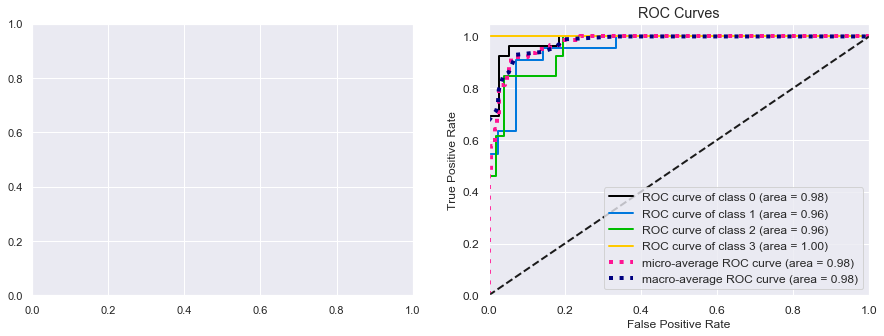

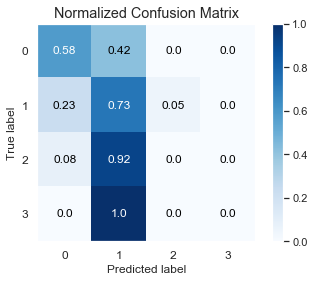

In [133]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = SVC()  
clf.fit(X_t_train, y_train)
print ( clf.score(X_t_test, y_test))
#print ( clf.predict(X_t_test)
y_pred_PCC=clf.predict(X_t_test)
print(classification_report(y_pred_PCC,y_test))
print("_"*100)
#y_probas = clf.predict_proba(X_t_test)
f, axes = plt.subplots(1, 2,figsize=(15, 5), sharex=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_PCC, normalize=True)
skplt.metrics.plot_roc(y_test, y_probas,ax=axes[1])